In [2]:
# Import libraries
import matplotlib.pyplot as plt; import numpy as np; import netCDF4; from netCDF4 import Dataset
import pandas as pd; import numpy.ma as ma; import time as timeit; import os; import math
import itertools; import scipy.io; import mat73; import collections
import cartopy; import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import AutoMinorLocator; from matplotlib.ticker import FixedLocator
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
%matplotlib inline
import statistics; import xarray as xr

In [3]:
import matplotlib as mpl

In [4]:
file_in ='Etopo1_Bed_35_65N_40_80W.nc'
NC=Dataset(file_in); DS=xr.open_dataset(file_in)

projection= ccrs.PlateCarree(central_longitude=255);
data_crs = ccrs.PlateCarree()

In [5]:
latNC= NC['lat'][:]
lonNC= NC['lon'][:]
depthNC= NC['depth'][:]

In [6]:
neww = [['', '', '40.00', '', '', '69.50'], ['', '', '40.30', '', '', '68.00'], ['', '', '40.40', '', '', '67.50'], ['', '', '40.60', '', '', '67.00'], ['', '', '40.80', '', '', '66.50'], ['', '', '41.45', '', '', '66.00'], ['', '', '41.80', '', '', '65.70'], ['', '', '42.10', '', '', '66.00'], ['', '', '42.10', '', '', '67.00'], ['', '', '42.10', '', '', '67.50'], ['', '', '41.80', '', '', '68.00'], ['', '', '41.10', '', '', '69.00'], ['', '', '41.00', '', '', '69.50'], ['', '', '40.00', '', '', '69.50']]
lon_w = []; lat_w = []
for i in range(14): 
    w1 = neww[i][2]
    lat_w.append(w1)
    w3 = neww[i][5]
    lon_w.append(w3)
lonlist_w = [float(i) for i in lon_w]; latlist_w = [float(i) for i in lat_w]
lonlist_wneg = [float(i)*-1 for i in lon_w]
df_w = pd.DataFrame({'lon': lonlist_w, 'lat': latlist_w,})
df_w_plottable = pd.DataFrame({'lon': lonlist_wneg, 'lat': latlist_w,})

lonlist_w_plot = [float(i)*-1 for i in lon_w]; latlist_w = [float(i) for i in lat_w]
df_w_plot = pd.DataFrame({'lon': lonlist_w_plot, 'lat': latlist_w,})
x_w = df_w_plot['lon']; y_w = df_w_plot['lat']
polygon_w = Polygon(df_w.values)

In [7]:
newv = [['', '', '37.00', '', '', '76.00'], ['', '', '36.00', '', '', '75.50'], ['', '', '35.50', '', '', '75.00'], ['', '', '36.00', '', '', '74.75'], ['', '', '37.40', '', '', '74.50'], ['', '', '39.50', '', '', '72.00'], ['', '', '40.50', '', '', '74.00'], ['', '', '39.40', '', '', '74.25'], ['', '', '37.00', '', '', '76.00']]
lon_v = []; lat_v = []
for i in range(9): 
    v1 = newv[i][2]
    lat_v.append(v1)
    v3 = newv[i][5]
    lon_v.append(v3)
lonlist_v = [float(i) for i in lon_v]; latlist_v = [float(i) for i in lat_v]
df_v = pd.DataFrame({'lon': lonlist_v, 'lat': latlist_v,})
lonlist_v_plot = [float(i)*-1 for i in lon_v]; latlist_v = [float(i) for i in lat_v]
df_v_plot = pd.DataFrame({'lon': lonlist_v_plot, 'lat': latlist_v,})
x_v = df_v_plot['lon']; y_v = df_v_plot['lat']

lonlist_vneg = [float(i)*-1 for i in lon_v]
df_v_plottable = pd.DataFrame({'lon': lonlist_vneg, 'lat': latlist_v,})
polygon_v = Polygon(df_v.values.tolist())

In [8]:
newx = [['', '', '40.50', '', '', '74.00'], ['', '', '39.50', '', '', '72.00'], ['', '', '40.00', '', '', '71.40'], ['', '', '40.00', '', '', '69.50'], ['', '', '41.00', '', '', '69.50'], ['', '', '41.10', '', '', '70.00'], ['', '', '41.00', '', '', '72.00'], ['', '', '40.50', '', '', '74.00']]
lon_x = []; lat_x = []
for i in range(8): 
    x1 = newx[i][2]
    lat_x.append(x1)
    x3 = newx[i][5]
    lon_x.append(x3)
lonlist_x = [float(i) for i in lon_x]; latlist_x = [float(i) for i in lat_x]
df_x = pd.DataFrame({'lon': lonlist_x, 'lat': latlist_x,})
lonlist_x_plot = [float(i)*-1 for i in lon_x]; latlist_x = [float(i) for i in lat_x]
df_x_plot = pd.DataFrame({'lon': lonlist_x_plot, 'lat': latlist_x,})
x_x = df_x_plot['lon']; y_x = df_x_plot['lat']

lonlist_xneg = [float(i)*-1 for i in lon_x]
df_x_plottable = pd.DataFrame({'lon': lonlist_xneg, 'lat': latlist_x,})
polygon_x = Polygon(df_x.values.tolist())

In [9]:
newy = [['', '', '41.80', '', '', '68.00'], ['', '', '42.10', '', '', '67.50'], ['', '', '42.10', '', '', '67.00'], ['', '', '42.10', '', '', '66.00'], ['', '', '43.00', '', '', '66.00'], ['', '', '44.20', '', '', '66.50'], ['', '', '44.20', '', '', '67.00'], ['', '', '44.20', '', '', '68.00'], ['', '', '41.80', '', '', '68.00']]
lon_y = []; lat_y = []
for i in range(9): 
    y1 = newy[i][2]
    lat_y.append(y1)
    y3 = newy[i][5]
    lon_y.append(y3)
lonlist_y = [float(i) for i in lon_y]; latlist_y = [float(i) for i in lat_y]
df_y = pd.DataFrame({'lon': lonlist_y, 'lat': latlist_y,})
lonlist_y_plot = [float(i)*-1 for i in lon_y]; latlist_y = [float(i) for i in lat_y]
df_y_plot = pd.DataFrame({'lon': lonlist_y_plot, 'lat': latlist_y,})
x_y = df_y_plot['lon']; y_y = df_y_plot['lat']

lonlist_yneg = [float(i)*-1 for i in lon_y]
df_y_plottable = pd.DataFrame({'lon': lonlist_yneg, 'lat': latlist_y,})
polygon_y = Polygon(df_y.values)

In [10]:
newt = [['', '', '42.20', '', '', '70.50'], ['', '', '42.00', '', '', '70.00'], ['', '', '41.10', '', '', '69.00'], ['', '', '41.80', '', '', '68.00'], ['', '', '44.20', '', '', '68.00'], ['', '', '43.90', '', '', '69.00'], ['', '', '43.70', '', '', '70.00'], ['', '', '43.00', '', '', '70.50'], ['', '', '42.20', '', '', '70.50']]
lon_t = []; lat_t = []
for i in range(9): 
    t1 = newt[i][2]
    lat_t.append(t1)
    t3 = newt[i][5]
    lon_t.append(t3)
lonlist_t = [float(i) for i in lon_t]; latlist_t = [float(i) for i in lat_t]
df_t = pd.DataFrame({'lon': lonlist_t, 'lat': latlist_t,})
lonlist_t_plot = [float(i)*-1 for i in lon_t]; latlist_t = [float(i) for i in lat_t]
df_t_plot = pd.DataFrame({'lon': lonlist_t_plot, 'lat': latlist_t,})
x_t = df_t_plot['lon']; y_t = df_t_plot['lat']

lonlist_tneg = [float(i)*-1 for i in lon_t]
df_t_plottable = pd.DataFrame({'lon': lonlist_tneg, 'lat': latlist_t,})
polygon_t = Polygon(df_t.values)

In [11]:
glorys12v1 ='global-reanalysis-phy-001-030-daily_1596465428590.nc'

In [12]:
DS=xr.open_dataset(glorys12v1)

In [1160]:
index_min_lat_list = []; index_min_lon_list = []; Gloryslat = []; Gloryslon = [] # inlon = []; inlat = []; date = [] 
data = []; data_sal = []; data_temp = []; data_dens = []; latfromGLORYS = []; lonfromGLORYS = []; pointstouse = []; inlatitude = []; inlongitude = []
years = [];correctedwospatdiffstd = []; ratio_of_water_column_std_corrected = []
seasonyeardepth = []; countwithinpolygon = []; correctedwospatdiffmean = [] ; latlat = []; ydyd = []
ratio_of_water_column = []; now = []; later = []; ratio_of_water_column_corrected = [] ; lonlon = []
for year in range(1993,2019):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; yd_intermediate = []
    p_intermediate = []; t_intermediate = []; sal_intermediate = []
    floor_intermediate = []; surfaceval_list = []
    seasonyeardepth2 = []; ratio_of_water_column2 = []
    #inlatitude = []; inlongitude = []; 
    date = []; counterii = []
    
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        gear = npfile[i]['gear']
        floordepth = npfile[i]['depth']
        if yd > 334 and yd <= 365:
#         if (yd > 334 and yd <= 365) or (yd >= 0 and yd <= 59) :
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])
            sal_intermediate.append(npfile[i]['s'])
            floor_intermediate.append(npfile[i]['depth'])
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate,'depth': floor_intermediate, 's': sal_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate,'date': yd_intermediate})
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if isinstance(month_df['p'].iloc[ii], int) or isinstance(month_df['p'].iloc[ii], float) or isinstance(month_df['t'].iloc[ii], int) or isinstance(month_df['t'].iloc[ii], float):
            pass
        elif polygon_w.contains(point) == True or polygon_t.contains(point) == True or polygon_y.contains(point) == True or polygon_v.contains(point) == True or polygon_x.contains(point) == True:
            years.append(year)
            latlat.append(npfile[ii]['lat'])
            lonlon.append(npfile[ii]['lon'])
            counterii.append(ii)

    inlat = []; inlon = []; date = []
    for timer in counterii:
        inlat.append(newdf['lat'][timer])
        inlon.append(newdf['lon'][timer])
        date.append(newdf['date'][timer])   
        inlongitude.append(newdf['lon'][timer])
        inlatitude.append(newdf['lat'][timer])
        ydyd.append(newdf['date'][timer])
        full = pd.DataFrame({'lat': inlat, 'lon': inlon, 'date': date}) 
    print(year)
        
    for x in range(len(date)):
        use=DS.sel(time=slice('{}-12-01'.format(year),'{}-12-31'.format(year))) 
        locate_date = use.sel(time=use.time.dt.day==(date[x])-334)
        mld_locate_date = locate_date.mlotst.values[0]
    
        lat = np.array(locate_date.mlotst['latitude'][:])
        long = np.array(locate_date.mlotst['longitude'][:])

        lonneg = [float(i)*-1 for i in inlon]
        distanceslat = []; distanceslon = [] # index_min_lat_list = []; index_min_lon_list = []
        for i in range(133):
            distanceslat.append((inlat[x] - lat[i])**2)
            index_min_lat = min(range(len(distanceslat)), key=distanceslat.__getitem__)
            gloryslatval = float(DS['latitude'][index_min_lat])
        Gloryslat.append(gloryslatval)
        index_min_lat_list.append(index_min_lat)
        for ii in range(181):
            distanceslon.append((lonneg[x] - long[ii])**2)
            index_min_lon = min(range(len(distanceslon)), key=distanceslon.__getitem__)
            gloryslonval = float(DS['longitude'][index_min_lon])
        Gloryslon.append(gloryslonval)        
        index_min_lon_list.append(index_min_lon)
        lat_index_use, lon_index_use = index_min_lat, index_min_lon

print(len(inlatitude))
print(len(inlongitude))
print(len(ydyd))
print(len(years))
print(len(index_min_lat_list))
print(len(index_min_lon_list))
print(len(Gloryslat))
print(len(Gloryslon))

fulljan = pd.DataFrame({'obs_lat': inlatitude, 'obs_lon': inlongitude, 'date': ydyd, 'year': years, 'glorys_index_lat':index_min_lat_list,'glorys_index_lon':index_min_lon_list, 'glorys_lat':Gloryslat, 'glorys_lon':Gloryslon}) 
#         pointstouse.append(mld_locate_date[lat_index_use, lon_index_use]) 

1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
258
258
258
258
258
258
258
258
     obs_lat  obs_lon  date  year  glorys_index_lat  glorys_index_lon  \
0    40.9000  70.6833   335  1993                71                88   
1    41.0350  70.3667   335  1993                72                92   
2    41.0650  70.0300   335  1993                73                96   
3    40.9317  70.1333   335  1993                71                94   
4    40.9300  69.9850   335  1993                71                96   
..       ...      ...   ...   ...               ...               ...   
253  41.0383  70.2283   342  2011                72                93   
254  41.0367  70.2817   342  2011                72                93   
255  41.0367  70.3333   342  2011                72                92   
256  41.0367  70.3983   342  2011                72                91   
257  41.0600  70.5133   342  2011  

In [97]:
# fulljan.to_csv('jan.csv')

     obs_lat  obs_lon  date  year  glorys_index_lat  glorys_index_lon  \
0    40.9000  70.6833   335  1993                71                88   
1    41.0350  70.3667   335  1993                72                92   
2    41.0650  70.0300   335  1993                73                96   
3    40.9317  70.1333   335  1993                71                94   
4    40.9300  69.9850   335  1993                71                96   
..       ...      ...   ...   ...               ...               ...   
253  41.0383  70.2283   342  2011                72                93   
254  41.0367  70.2817   342  2011                72                93   
255  41.0367  70.3333   342  2011                72                92   
256  41.0367  70.3983   342  2011                72                91   
257  41.0600  70.5133   342  2011                73                90   

     glorys_lat  glorys_lon  
0     40.916668  -70.666664  
1     41.000000  -70.333336  
2     41.083332  -70.000000  
3  

In [111]:
# mld_locate_date = locate_date.mlotst.values[0]
# print(locate_date.mlotst.values[110].shape)

In [112]:
# use=DS.sel(time=slice('01-01-01'.format(1993),'{}-01-31'.format(year))) 
# locate_date = use.sel(time=use.time.dt.day==(date[x])-0)
# mld_locate_date = locate_date.mlotst.values[0]

In [113]:
# float(DS['latitude'][110])

In [114]:
# new = DS['mlotst'][0].values

In [115]:
# print(new)

In [116]:
# new[75,75]

In [117]:
# use=DS.sel(time=slice('{}-01-01'.format(year),'{}-01-31'.format(year))) 
# locate_date = use.sel(time=use.time.dt.day==(date[x])-0)
# mld_locate_date = locate_date.mlotst.values[0]
# mld_locate_date = locate_date.mlotst.values

In [15]:
import gsw

In [ ]:
            for ix in range(len(dffinunreversed)):
                if dffinunreversed.at[ix,'density'] >= (surfacevalmean - 0.03) and dffinunreversed.at[ix,'density'] <= (surfacevalmean + 0.03):
                    if dffinunreversed.at[len(dffinunreversed)-1,'density'] <= (surfacevalmean + 0.03) and dffinunreversed.at[len(dffinunreversed)-1,'density'] >= (surfacevalmean - 0.03):
                        looknow = list(dffinunreversed['density'].values)
                        looknow2 = [i for i in looknow if i >= (surfacevalmean + 0.03)]
                        looknow3 = [i for i in looknow if i <= (surfacevalmean - 0.03)]
                        if len(looknow2) == 0 and len(looknow3) == 0:
                            if dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                                if dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                                    seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                    seasonyeartemp.append(dffinunreversed.at[ix,'temp'])
                                    seasonyearsal.append(dffinunreversed.at[ix,'sal'])
                                    seasonyeardens.append(dffinunreversed.at[len(dffinunreversed)-1,'density'])
                                    floors.append(month_df['depth'].iloc[ii])
                                    lat.append(month_df['lat'].iloc[ii])
                                    lon.append(month_df['lon'].iloc[ii])
                                    lonneg.append(month_df['lon'].iloc[ii]*-1)
                                    counterii.append(ii)
                                    option6.append(ii)
                                    break
                                else:
                                    seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                    seasonyeartemp.append(dffinunreversed.at[ix,'temp'])
                                    seasonyearsal.append(dffinunreversed.at[ix,'sal'])
                                    seasonyeardens.append(dffinunreversed.at[len(dffinunreversed)-1,'density'])
                                    floors.append(month_df['depth'].iloc[ii])
                                    lat.append(month_df['lat'].iloc[ii])
                                    lon.append(month_df['lon'].iloc[ii])
                                    lonneg.append(month_df['lon'].iloc[ii]*-1)
                                    counterii.append(ii)
                                    option6.append(ii)
                                    break
                            else:
                                if dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                                    seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                    seasonyeartemp.append(dffinunreversed.at[ix,'temp'])
                                    seasonyearsal.append(dffinunreversed.at[ix,'sal'])
                                    seasonyeardens.append(dffinunreversed.at[len(dffinunreversed)-1,'density'])
                                    floors.append(month_df['depth'].iloc[ii])
                                    lat.append(month_df['lat'].iloc[ii])
                                    lon.append(month_df['lon'].iloc[ii])
                                    lonneg.append(month_df['lon'].iloc[ii]*-1)
                                    counterii.append(ii)
                                    option6.append(ii)
                                    break
                        else:
                            if dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                                for ix in range(len(dffinunreversed['density'])):
                                    if dffinunreversed.at[ix,'density'] >= (surfacevalmean - 0.03) and dffinunreversed.at[ix,'density'] <= (surfacevalmean + 0.03):
                                        pass
                                    else:
                                        if dffinunreversed.at[ix,'pressure'] >= 5:
                                            seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                            seasonyeartemp.append(dffinunreversed.at[ix,'temp'])
                                            seasonyearsal.append(dffinunreversed.at[ix,'sal'])
                                            seasonyeardens.append(dffinunreversed.at[len(dffinunreversed)-1,'density'])
                                            floors.append(month_df['depth'].iloc[ii])
                                            lat.append(month_df['lat'].iloc[ii])
                                            lon.append(month_df['lon'].iloc[ii])
                                            lonneg.append(month_df['lon'].iloc[ii]*-1)
                                            counterii.append(ii)
                                            option6.append(ii)
                                            break
                                        else:
                                            break
                                break 
                    else:
                        if dffinunreversed.at[ix,'density'] <= (surfacevalmean - 0.03) or dffinunreversed.at[ix,'density'] >= (surfacevalmean + 0.03):
                            if dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                                pass
                            else:
                                seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                seasonyeartemp.append(dffinunreversed.at[ix,'temp'])
                                seasonyearsal.append(dffinunreversed.at[ix,'sal'])
                                seasonyeardens.append(dffinunreversed.at[len(dffinunreversed)-1,'density'])
                                floors.append(month_df['depth'].iloc[ii])
                                lat.append(month_df['lat'].iloc[ii])
                                lon.append(month_df['lon'].iloc[ii])
                                lonneg.append(month_df['lon'].iloc[ii]*-1)
                                counterii.append(ii)
                                option6.append(ii)
                                break           
                        else: 
                            if dffinunreversed.at[ix,'density'] >= (surfacevalmean + 0.03) or dffinunreversed.at[ix,'density'] <= (surfacevalmean - 0.03):
                                seasonyeardepth.append('pass4')
                                break
#                                 pass
                elif dffinunreversed.at[ix,'density'] <= (surfacevalmean - 0.03) or dffinunreversed.at[ix,'density'] >= (surfacevalmean + 0.03):
                    if dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                        pass
                    else:
                        for ix in range(len(dffinunreversed['density'])):
                            if dffinunreversed.at[ix,'density'] >= (surfacevalmean - 0.03) and dffinunreversed.at[ix,'density'] <= (surfacevalmean + 0.03):
                                pass
                            else:
                                if dffinunreversed.at[ix,'pressure'] >= 5.0:
                                    seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                    seasonyeartemp.append(dffinunreversed.at[ix,'temp'])
                                    seasonyearsal.append(dffinunreversed.at[ix,'sal'])
                                    seasonyeardens.append(dffinunreversed.at[len(dffinunreversed)-1,'density'])
                                    floors.append(month_df['depth'].iloc[ii])
                                    lat.append(month_df['lat'].iloc[ii])
                                    lon.append(month_df['lon'].iloc[ii])
                                    lonneg.append(month_df['lon'].iloc[ii]*-1)
                                    counterii.append(ii)
                                    option6.append(ii)
                                    break
                                else:
                                    break
                        break
                else: 
                    seasonyeardepth.append('pass9')
                    break

# HERE

In [126]:
diff = []; latfull = []; lonfull = []; years = []; glorysfull = []; g_lonfull = []; g_latfull = []; g_indexlonfull = []; g_indexlatfull = []
option1 = []; option2 = []; option3 = []; option4 = []; option5 = []; option6 =[]; floorsfull = []
pointstouse = []; seasonalmean = []; seasonalstd = []; yearwithdata = []
finallatestdepth = []; finalfinaldepth = []; finalfinalratio = []; filteredMLDlist = []
meanfilteredMLDlist = []; stdfilteredMLDlist = []; years = []; bananasplitmean = []
bananasplitstd = [];floormean = [];floorstd = []; latfinal = []; lonfinal = []; ratiofinal = []
bottomdfinal = []; filteredfloorslist = [];zi_listofarrays = []

for year in range(1993,2019):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; yd_intermediate = []
    p_intermediate = []; t_intermediate = []; sal_intermediate = []
    finaldepth = []; finallat = [];finallon = []
    seasonyeardepth = []; seasonyeartemp = [];seasonyearsal = []; seasonyeardens = []
    counterii = []; floors = []; floor_intermediate = []; s_intermediate = []
    seasonyearsal = []; lat = []; lon = []; lonneg = []; pointstousesmall = []
    yearstodate = []
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        gear = npfile[i]['gear']
        floordepth = npfile[i]['depth']
        if gear == 'Bottle':
            pass
        if yd >= 0 and yd <= 31 and floordepth <= 200: # and floordepth <= 200
#         if yd > 59 and yd <= 90 and floordepth <= 200: # and floordepth <= 200
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])
            sal_intermediate.append(npfile[i]['s'])
            floor_intermediate.append(npfile[i]['depth'])
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate,'depth': floor_intermediate, 's': sal_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate,'date': yd_intermediate})
    print(year)

    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if isinstance(month_df['p'].iloc[ii], int) or isinstance(month_df['p'].iloc[ii], float) or isinstance(month_df['t'].iloc[ii], int) or isinstance(month_df['t'].iloc[ii], float):
            pass
#         elif polygon_w.contains(point) == True or polygon_y.contains(point) == True or polygon_t.contains(point) == True:
        elif polygon_x.contains(point) == True or polygon_v.contains(point) == True:
            CT = gsw.CT_from_pt(month_df['s'].iloc[ii],month_df['t'].iloc[ii])
            DENS = gsw.sigma0(month_df['s'].iloc[ii],CT)
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'t': month_df['t'].iloc[ii], 's': month_df['s'].iloc[ii], 'CT': CT, 'DENSMLD': DENS}) 
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            l=[i for i in df_final[0] if i<=6] 
            if len(l) > 0:
                surfaceval = []; numrange = []
                for iii in range(len(l)):
                    val = df_final[4][iii]
                    numrange.append(iii)
                    surfaceval.append(val)            
            surfacevalmean = statistics.mean(surfaceval)
            densfin = []; tempfin = []; pressurefin = []; salfin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
                salfin.append(df_final[2][iii])
                densfin.append(df_final[4][iii])
            d = {'temp': list(reversed(tempfin)), 'sal': list(reversed(salfin)), 'pressure': list(reversed(pressurefin)),'density': list(reversed(densfin))}
            dunreversed = {'temp': list(tempfin), 'sal': list(salfin), 'pressure': list(pressurefin), 'density': list(densfin)}
            dffinunreversed = pd.DataFrame(dunreversed)
            dffin = pd.DataFrame(d)
            
            for ix in range(len(dffinunreversed)):
                if dffinunreversed.at[ix,'density'] >= (surfacevalmean - 0.03) and dffinunreversed.at[ix,'density'] <= (surfacevalmean + 0.03):
                    if dffinunreversed.at[len(dffinunreversed)-1,'temp'] <= (surfacevalmean + 0.03) and dffinunreversed.at[len(dffinunreversed)-1,'temp'] >= (surfacevalmean - 0.03):
                        looknow = list(dffinunreversed['temp'].values)
                        looknow2 = [i for i in looknow if i >= (surfacevalmean + 0.03)]
                        looknow3 = [i for i in looknow if i <= (surfacevalmean - 0.03)]
                        for now in range(len(looknow)):
                            if looknow[now] >= (surfacevalmean + 0.03) and (dffinunreversed['pressure'].values)[now] >= 5:
                                
                                seasonyeardepth.append(list(dffinunreversed['pressure'].values)[now])
                                seasonyeartemp.append(list(dffinunreversed['temp'].values)[now])
                                seasonyearsal.append(list(dffinunreversed['sal'].values)[now])
                                seasonyeardens.append(list(dffinunreversed['density'].values)[now])
                                floors.append(month_df['depth'].iloc[ii])
                                lat.append(month_df['lat'].iloc[ii])
                                lon.append(month_df['lon'].iloc[ii])
                                lonneg.append(month_df['lon'].iloc[ii]*-1)
                                counterii.append(ii)
                                option1.append(ii) # well-defined MLD
                                break
                        if len(looknow2) == 0 and len(looknow3) == 0 and dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= 5:
                            seasonyeardepth.append(dffinunreversed.at[len(dffinunreversed)-1,'pressure'])
                            seasonyeartemp.append(dffinunreversed.at[len(dffinunreversed)-1,'temp'])
                            seasonyearsal.append(dffinunreversed.at[len(dffinunreversed)-1,'sal'])
                            seasonyeardens.append(dffinunreversed.at[len(dffinunreversed)-1,'density'])
                            floors.append(month_df['depth'].iloc[ii])
                            lat.append(month_df['lat'].iloc[ii])
                            lon.append(month_df['lon'].iloc[ii])
                            lonneg.append(month_df['lon'].iloc[ii]*-1)
                            counterii.append(ii)
                            option2.append(ii) # fully mixed profile (from some troublesome profiles)
                        break
                    else:
                        pass                    
                else:
                    if dffinunreversed.at[ix,'pressure'] >= (month_df['depth'].iloc[ii] - 6): # ALL MIXED
                        if dffinunreversed.at[ix,'pressure'] == dffinunreversed.at[len(dffinunreversed)-1,'pressure']:
                            if dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - 6):
                                pass
                            else:
                                if month_df['depth'].iloc[ii] <= 300 and dffinunreversed.at[ix,'pressure'] >= 5:
                                    seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                    seasonyeartemp.append(dffinunreversed.at[ix,'temp'])
                                    seasonyearsal.append(dffinunreversed.at[ix,'sal'])
                                    seasonyeardens.append(dffinunreversed.at[len(dffinunreversed)-1,'density'])
                                    floors.append(month_df['depth'].iloc[ii])
                                    lat.append(month_df['lat'].iloc[ii])
                                    lon.append(month_df['lon'].iloc[ii])
                                    lonneg.append(month_df['lon'].iloc[ii]*-1)
                                    counterii.append(ii)
                                    option3.append(ii)
                        else:
                            if month_df['depth'].iloc[ii] <= 300 and dffinunreversed.at[ix,'pressure'] >= 5:
                                seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                seasonyeartemp.append(dffinunreversed.at[ix,'temp'])
                                seasonyearsal.append(dffinunreversed.at[ix,'sal'])
                                seasonyeardens.append(dffinunreversed.at[len(dffinunreversed)-1,'density'])
                                floors.append(month_df['depth'].iloc[ii])
                                lat.append(month_df['lat'].iloc[ii])
                                lon.append(month_df['lon'].iloc[ii])
                                lonneg.append(month_df['lon'].iloc[ii]*-1)
                                counterii.append(ii)
                                option4.append(ii)
                    elif dffinunreversed.at[ix,'pressure'] == 0:
                        pass
                    elif ix == 0: 
                        if month_df['depth'].iloc[ii] <= 300 and dffinunreversed.at[ix,'pressure'] >= 5:
                            seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                            seasonyeartemp.append(dffinunreversed.at[ix,'temp'])
                            seasonyearsal.append(dffinunreversed.at[ix,'sal'])
                            seasonyeardens.append(dffinunreversed.at[len(dffinunreversed)-1,'density'])
                            floors.append(month_df['depth'].iloc[ii])
                            lat.append(month_df['lat'].iloc[ii])
                            lon.append(month_df['lon'].iloc[ii])
                            lonneg.append(month_df['lon'].iloc[ii]*-1)
                            counterii.append(ii)
                            option5.append(ii)
                    else: # Well-defined mixed layer detected
                        if month_df['depth'].iloc[ii] <= 300 and dffinunreversed.at[ix,'pressure'] >= 5:
                            seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                            seasonyeartemp.append(dffinunreversed.at[ix,'temp'])
                            seasonyearsal.append(dffinunreversed.at[ix,'sal'])
                            seasonyeardens.append(dffinunreversed.at[len(dffinunreversed)-1,'density'])
                            floors.append(month_df['depth'].iloc[ii])
                            lat.append(month_df['lat'].iloc[ii])
                            lon.append(month_df['lon'].iloc[ii])
                            lonneg.append(month_df['lon'].iloc[ii]*-1)
                            counterii.append(ii)
                            option6.append(ii)
                            break
                    break

    inlat = []; inlon = []; date = []
    g_lat = []; g_lon = []; g_indexlon = []; g_indexlat = []
    for timer in counterii:
        inlat.append(newdf['lat'][timer])
        inlon.append(newdf['lon'][timer])
        date.append(newdf['date'][timer])                 
    if len(seasonyeardepth) > 0:    
#         if len(seasonyeardepth) == 1:  
#             std = 0
#             seasonalstd.append(std)
#         else:
#             seasonalstd.append(statistics.stdev(seasonyeardepth))
        yearwithdata.append(year)
        seasonalmean.append(statistics.mean(seasonyeardepth))
#         seasonalstd.append(statistics.stdev(seasonyeardepth))
        full = pd.DataFrame({'mld': seasonyeardepth,'lat': lat, 'lon': lon, 'date': date}) 
        finallatestdepth.append(seasonyeardepth)
    print(len(seasonyeardepth))
    for x in range(len(date)):
        use=DS.sel(time=slice('{}-01-01'.format(year),'{}-01-31'.format(year))) 
        locate_date = use.sel(time=use.time.dt.day==(date[x])-0)
        mld_locate_date = locate_date.mlotst.values[0]
    
        lat = np.array(locate_date.mlotst['latitude'][:])
        long = np.array(locate_date.mlotst['longitude'][:])
    
        lonneg = [float(i)*-1 for i in inlon]
        distanceslat = []; distanceslon = []
        for i in range(133):
            distanceslat.append((inlat[x] - lat[i])**2)
            index_min_lat = min(range(len(distanceslat)), key=distanceslat.__getitem__)
        for ii in range(181):
            distanceslon.append((lonneg[x] - long[ii])**2)
            index_min_lon = min(range(len(distanceslon)), key=distanceslon.__getitem__)
        lat_index_use, lon_index_use = index_min_lat, index_min_lon
        gloryslonval = float(DS['longitude'][index_min_lon])
        gloryslatval = float(DS['latitude'][index_min_lat])
        g_lat.append(gloryslatval)
        g_lon.append(gloryslonval)
        g_indexlat.append(index_min_lat)
        g_indexlon.append(index_min_lon)
        pointstouse.append(mld_locate_date[lat_index_use, lon_index_use]) 
        yearstodate.append(year)
        pointstousesmall.append(mld_locate_date[lat_index_use, lon_index_use])
    newfull = pd.DataFrame({'mld': seasonyeardepth,'lat': inlat, 'lon': inlon, 'date': date, 'glorys': pointstousesmall}) 
    val1_minus_val10 = list(newfull["mld"] - newfull["glorys"])
    g_lonfull.append(g_lon)
    g_latfull.append(g_lat)
    g_indexlatfull.append(g_indexlat)
    g_indexlonfull.append(g_indexlon)
    diff.append(val1_minus_val10)
#     print('!!!!!', diff)
    latfull.append(list(newfull['lat']))
    lonfull.append(list(newfull['lon']))
    glorysfull.append(list(newfull['glorys']))
    years.append(list(yearstodate))
    floorsfull.append(floors)

1993
43
1994
7
1995
10
1996
0
1997
0
1998
0
1999
0
2000
0
2001
10
2002
0
2003
0
2004
0
2005
6
2006
3
2007
23
2008
36
2009
38
2010
0
2011
17
2012
16
2013
0
2014
0
2015
0
2016
0
2017
0
2018
0


In [127]:
obs_lon = [item for sublist in lonfull for item in sublist]
obs_lat = [item for sublist in latfull for item in sublist]
o_MLDminusG_MLD = [item for sublist in diff for item in sublist]
obs_MLD = [item for sublist in finallatestdepth for item in sublist]
year_ = [item for sublist in years for item in sublist]
GLORYS_MLD = pointstouse
GLORYS_lon = [item for sublist in g_lonfull for item in sublist]
GLORYS_lat = [item for sublist in g_latfull for item in sublist]
GLORYS_lonindex = [item for sublist in g_indexlonfull for item in sublist]
GLORYS_latindex = [item for sublist in g_indexlatfull for item in sublist]
pd_floors = [item for sublist in floorsfull for item in sublist]

In [128]:
print(np.nanmean(GLORYS_MLD))

37.997738


In [129]:
print(len(obs_lon))

209


In [ ]:
394 + 209

In [112]:
pandas = pd.DataFrame({'obs_lon': obs_lon,'obs_lat': obs_lat, 
                       'o_MLDminusG_MLD': o_MLDminusG_MLD, 'obs_MLD': obs_MLD, 
                       'GLORYS_MLD': GLORYS_MLD, 'GLORYS_lon':GLORYS_lon, 'GLORYS_lat':GLORYS_lat ,
                       'GLORYS_lonindex':GLORYS_lonindex,'GLORYS_latindex':GLORYS_latindex, 'pd_floors' : pd_floors, 'year_': year_}) 


In [113]:
# pandas.to_csv('march_wyt.csv')
pandas.to_csv('april_xv.csv')

In [87]:
print(np.nanmean(GLORYS_MLD))
print(np.nanmean(obs_MLD))

28.089888
33.2043956043956


In [78]:
print(o_MLDminusG_MLD[0:10])
print(obs_MLD[0:10])
print(GLORYS_MLD[0:10])
print(GLORYS_lonindex[0:10])
print(GLORYS_latindex[0:10])
print(year_[0:10])

[-3.7496261596679688, -12.005922317504883, -3.1229591369628906, -7.074069976806641, 13.402965545654297, -8.496293067932129, 15.604448318481445, -0.3762931823730469, -4.411848068237305, 4.724448204040527]
[8.0, 6.0, 10.0, 12.0, 25.0, 6.0, 33.0, 10.0, 11.0, 18.0]
[11.749626, 18.005922, 13.122959, 19.07407, 11.597034, 14.496293, 17.395552, 10.376293, 15.411848, 13.275552]
[126, 129, 130, 132, 139, 136, 130, 114, 115, 120]
[71, 72, 73, 74, 84, 86, 82, 67, 66, 70]
[1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995]
[40.8883, 40.97, 41.073, 41.1917, 42.0283, 42.17, 41.7917, 40.542, 40.5317, 40.855]


In [62]:
print(len(g_lonfull))

26


In [55]:
print(len(years))

26


In [51]:
diffdiff = [item for sublist in diff for item in sublist]
print(len(diffdiff))

finallatestdepth_full = [item for sublist in finallatestdepth for item in sublist]
print(len(finallatestdepth_full))

465
465


In [ ]:
-121.31700134277344
205.19852256774902
6.592481079511745

In [48]:
print(np.nanmin(diffdiff))
print(np.nanmax(diffdiff))
print(np.nanmean(diffdiff))

-67.97775268554688
159.7570400238037
2.4227963247229405


In [41]:
print(np.nanmin(finallatestdepth_full))
print(np.nanmax(finallatestdepth_full))
print(np.nanmean(finallatestdepth_full))

5.0
220.0
21.229062177945725


In [38]:
print(np.min(finallatestdepth_full))

5.0


In [1566]:
summed = 92 + 109 + 52 + 96 + 94 + 86 + 99 + 101 + 144 + 138 + 75 + 100 + 74 + 107 + 108 + 42 + 55 + 48 + 63 +69 +54
print(summed)

1806


In [1560]:
print(len(finallatestdepth))
nicenice = [item for sublist in finallatestdepth for item in sublist]

21


In [1561]:
print(len(nicenice))

1806


In [1549]:
hi = [[11.530380249023438, 20.397043228149414, -14.151100158691406, -7.251842498779297, 33.89333724975586, 19.182225227355957, -3.992586135864258, -0.8370323181152344, -4.4148101806640625, -1.3629589080810547, 9.705188751220703, -3.540729522705078, -25.69036102294922, 12.715564727783203, -28.284435272216797, -6.4370269775390625, -9.709617614746094, 29.410381317138672, -3.1318435668945312, 6.835563659667969, 4.920009613037109, -2.0770301818847656, -3.4177703857421875, -2.6222152709960938, -43.682945251464844, -5.5170135498046875, -38.44886779785156, -44.5110969543457, -12.481460571289062, -19.167396545410156, -15.677024841308594, 1.6888923645019531, -2.4399871826171875, 3.3259353637695312, -4.210365295410156, 4.419262886047363, 4.893337249755859, 10.448894500732422, -4.813320159912109, -2.900726318359375, -2.8296165466308594, 4.5496368408203125, 5.977781295776367, 4.487410545349121, 9.062225341796875, -2.681478500366211, 8.165928840637207, 2.623706817626953, -0.3629589080810547, 11.416301727294922, -6.488880157470703, -1.6933212280273438, -1.0370216369628906, -5.579246520996094, -8.085914611816406, -60.41331481933594, -46.315528869628906, -8.124427795410156, -0.7970237731933594, -19.96591567993164, -7.488880157470703, 17.680011749267578, 7.284458160400391, -15.835533142089844, 4.813346862792969, -18.579246520996094, -0.5273933410644531, -25.634056091308594, 20.23261260986328, -30.456283569335938, 0.4015045166015625], [-14.81332015991211, 8.949642181396484, -3.442951202392578, -13.134803771972656, 18.751117706298828, 19.198522567749023, 15.263708114624023, 3.078521728515625, 1.078521728515625, -2.8207359313964844, -1.2651786804199219, -4.303691864013672, 1.6089019775390625, -33.09925079345703, 8.01778793334961, -17.314067840576172, 13.555558204650879, 14.004451751708984, -5.488880157470703, 2.663715362548828, 6.157047271728516, 2.8222274780273438, -6.4177703857421875, -1.6222152709960938], [1.0207481384277344, -4.303691864013672, 0.30371856689453125, -20.380722045898438, 25.527416229248047, -9.148139953613281, 5.5822296142578125, 13.579269409179688, 18.95260238647461, 14.865196228027344, 16.810382843017578, 11.573348999023438, 6.5303802490234375, -19.339248657226562, -0.23850631713867188, -14.527393341064453, -30.582199096679688, -3.4266510009765625, 0.40445709228515625], [], [], [], [], [], [35.04592990875244, 31.410381317138672, -2.4696197509765625, -16.75851058959961, -6.641471862792969, -3.949615478515625, -6.663688659667969, -2.7318382263183594, 26.562973022460938, -1.3525848388671875, -2.7940635681152344, 13.0533447265625, -5.085914611816406], [], [], [], [-32.30369186401367, -13.434066772460938, 3.448894500732422, -25.15406036376953, -8.394058227539062, 4.903713226318359], [38.653337478637695, 13.062225341796875, 37.653337478637695], [21.50074577331543, 26.51704216003418, 21.040008544921875, 18.040008544921875, 17.682971954345703, 25.24148941040039, -30.537769317626953, 34.24445152282715, 17.397043228149414, 22.127412796020508, 6.143709182739258, -3.265178680419922, 0.9777812957763672, -1.0740699768066406, 5.114077568054199, 3.640003204345703, 0.078521728515625, -5.736291885375977, 15.604448318481445, 47.96889877319336, -2.0311012268066406, 31.154083251953125, 21.560012817382812, 3.9229698181152344, 4.816307067871094, 36.68001174926758], [33.60148811340332, 37.09482002258301, 22.90667152404785, 36.754079818725586, 59.60148811340332, 18.348154067993164, 6.471114158630371, -0.4118480682373047, 31.04296875, 28.029632568359375, 9.95852279663086, 31.536300659179688, 27.672595977783203, 13.1140775680542, 24.672595977783203, 37.53630065917969, -9.49925422668457, 25.792595863342285, 17.47111415863037, 16.47111415863037, 25.47111415863037, -9.49925422668457, -12.04739761352539, 14.503706932067871, 14.503706932067871, -4.047397613525391, -22.66368865966797, 7.46815299987793, 17.669635772705078, 21.397043228149414, 17.90667152404785, 9.46815299987793, -4.4236907958984375, 14.623706817626953, 18.234076499938965, 9.1185302734375, -3.6607284545898438, -2.7851810455322266, -3.207404136657715, -4.207404136657715, 10.471114158630371, -2.599996566772461, 2.5763092041015625, 10.263708114624023, 2.088897705078125, 8.576309204101562, -7.034061431884766, 1.9881553649902344, 7.04296875, 11.182225227355957, 9.182225227355957, 11.318521499633789, -3.4014739990234375, -1.5436897277832031, -4.543689727783203, -1.0829505920410156, 15.939266204833984, -1.5925827026367188, -26.968875885009766, -0.9688758850097656, -49.87109375, -32.22220993041992, -32.96591567993164, -6.995548248291016, 2.5763092041015625], [16.669635772705078, 17.669635772705078, -7.4696197509765625, -4.232585906982422, -1.9925861358642578, 8.19260025024414, 25.725940704345703, -17.598495483398438, 9.401504516601562, -26.04739761352539, 2.860743522644043, 32.41630172729492, -6.752588272094727, -14.322948455810547, 33.02667045593262, -53.783687591552734, -28.426651000976562, -14.494800567626953, 11.471114158630371, -2.878509521484375, 47.28000450134277, -13.46666145324707, -3.4666614532470703, 8.737783432006836, -3.226663589477539, -4.226663589477539, 5.0755615234375, 4.920009613037109, 23.108154296875, 0.21185684204101562, 0.21185684204101562, 2.010374069213867, 9.266670227050781, 2.04296875, -9.94073486328125, 10.471114158630371, 0.4711141586303711, 19.072601318359375, -35.761470794677734, -15.79110336303711, -14.281475067138672, 6.946681976318359, -84.2503433227539, -53.250343322753906, 15.328895568847656, 14.734821319580078, -90.97329711914062, -84.97329711914062], [], [0.38074684143066406, -1.4696197509765625, 17.93630599975586, 34.12445068359375, 74.14666938781738, -11.260719299316406, 56.179264068603516, 51.68889236450195, 40.14666938781738, -97.27552032470703, -89.06071472167969, -103.46664428710938, -103.46664428710938, 18.994077682495117, 30.296302795410156, -10.927398681640625, -51.96441650390625, -0.3985118865966797, 8.536300659179688, 10.536300659179688, 12.536300659179688, 14.536300659179688, 14.536300659179688], [92.45185470581055, 69.24741172790527, 59.162967681884766, 29.808892250061035, 20.47111415863037, 10.623706817626953, 4.318521499633789, 44.47111415863037, -4.528885841369629, 13.860743522644043, 43.41926288604736, -33.794063568115234, 47.55555820465088, -20.36591911315918, 29.40000343322754, -5.36591911315918, -2.3659191131591797], [], [], [], [], [], []]
nice = [item for sublist in hi for item in sublist]

In [1550]:
print(len(nice))
newnice = [item for sublist in latfull for item in sublist]
print(len(newnice))

315
315


In [1553]:
print(len(flat_lonfull_feb_vx))

1806


In [1480]:
# September (w, y, t)
# flat_lonfull_sept_wyt = [item for sublist in lonfull for item in sublist]
# flat_latfull_sept_wyt = [item for sublist in latfull for item in sublist]
# flat_diff_sept_wyt = [item for sublist in diff for item in sublist]
# flat_years_sept_wyt = [item for sublist in years for item in sublist]
# flat_glorys_sept_wyt = [item for sublist in glorysfull for item in sublist]

In [1483]:
# September (x, v)
# flat_lonfull_sept_vx = [item for sublist in lonfull for item in sublist]
# flat_latfull_sept_vx = [item for sublist in latfull for item in sublist]
# flat_diff_sept_vx = [item for sublist in diff for item in sublist]
# flat_years_sept_vx = [item for sublist in years for item in sublist]
# flat_glorys_sept_vx = [item for sublist in glorysfull for item in sublist]

In [1593]:
concatlon = flat_lonfull_dec_wyt + flat_lonfull_dec_vx
concatlat = flat_latfull_dec_wyt + flat_latfull_dec_vx
concatdiff = flat_diff_dec_wyt + flat_diff_dec_vx
concatyears = flat_years_dec_wyt + flat_years_dec_vx
concatglorys = flat_glorys_dec_wyt + flat_glorys_dec_vx
dec_name = pd.DataFrame(list(zip(concatlon,concatlat,concatdiff,concatyears,concatglorys)),columns = ['lon','lat','diff','years','glorys'])
dec_name.to_csv('dec.csv')


In [1594]:
print(dec_name)

         lon      lat       diff  years     glorys
0    69.4400  40.2300   1.920010   1993  37.079990
1    69.4850  40.8633   0.325935   1993  39.674065
2    69.4500  40.7167  -1.268139   1993  42.268139
3    69.2550  40.6517  18.514080   1993  34.485920
4    69.4500  40.5533  11.105194   1993  40.894806
..       ...      ...        ...    ...        ...
253  70.2283  41.0383  -5.142218   2011  20.142218
254  70.2817  41.0367  -7.142218   2011  20.142218
255  70.3333  41.0367   9.994078   2011  18.005922
256  70.3983  41.0367  15.146669   2011  17.853331
257  70.5133  41.0600  15.841486   2011  18.158514

[258 rows x 5 columns]


In [1486]:
# October (x, v)
# flat_lonfull_oct_vx = [item for sublist in lonfull for item in sublist]
# flat_latfull_oct_vx = [item for sublist in latfull for item in sublist]
# flat_diff_oct_vx = [item for sublist in diff for item in sublist]
# flat_years_oct_vx = [item for sublist in years for item in sublist]
# flat_glorys_oct_vx = [item for sublist in glorysfull for item in sublist]

In [1489]:
# October (w, y, t)
# flat_lonfull_oct_wyt = [item for sublist in lonfull for item in sublist]
# flat_latfull_oct_wyt = [item for sublist in latfull for item in sublist]
# flat_diff_oct_wyt = [item for sublist in diff for item in sublist]
# flat_years_oct_wyt = [item for sublist in years for item in sublist]
# flat_glorys_oct_wyt = [item for sublist in glorysfull for item in sublist]

In [1492]:
# November (w, y, t)
# flat_lonfull_nov_wyt = [item for sublist in lonfull for item in sublist]
# flat_latfull_nov_wyt = [item for sublist in latfull for item in sublist]
# flat_diff_nov_wyt = [item for sublist in diff for item in sublist]
# flat_years_nov_wyt = [item for sublist in years for item in sublist]
# flat_glorys_nov_wyt = [item for sublist in glorysfull for item in sublist]

In [1495]:
# November (x, v)
# flat_lonfull_nov_vx = [item for sublist in lonfull for item in sublist]
# flat_latfull_nov_vx = [item for sublist in latfull for item in sublist]
# flat_diff_nov_vx = [item for sublist in diff for item in sublist]
# flat_years_nov_vx = [item for sublist in years for item in sublist]
# flat_glorys_nov_vx = [item for sublist in glorysfull for item in sublist]

In [1497]:
# print(len(flat_lonfull_nov_vx))
# print('lon = ',flat_lonfull_nov_vx)
# print('')
# print('lat = ',flat_latfull_nov_vx)
# print('')
# print('diff = ',flat_diff_nov_vx)
# print('')
# print('years = ',flat_years_nov_vx)
# print('')
# print('glorys = ',flat_glorys_nov_vx)

In [1446]:
# June (x, v)
# flat_lonfull_june_vx = [item for sublist in lonfull for item in sublist]
# flat_latfull_june_vx = [item for sublist in latfull for item in sublist]
# flat_diff_june_vx = [item for sublist in diff for item in sublist]
# flat_years_june_vx = [item for sublist in years for item in sublist]
# flat_glorys_june_vx = [item for sublist in glorysfull for item in sublist]

In [1449]:
# June (w, y, t)
# flat_lonfull_june_wyt = [item for sublist in lonfull for item in sublist]
# flat_latfull_june_wyt = [item for sublist in latfull for item in sublist]
# flat_diff_june_wyt = [item for sublist in diff for item in sublist]
# flat_years_june_wyt = [item for sublist in years for item in sublist]
# flat_glorys_june_wyt = [item for sublist in glorysfull for item in sublist]

In [1452]:
# July (w, y, t)
# flat_lonfull_july_wyt = [item for sublist in lonfull for item in sublist]
# flat_latfull_july_wyt = [item for sublist in latfull for item in sublist]
# flat_diff_july_wyt = [item for sublist in diff for item in sublist]
# flat_years_july_wyt = [item for sublist in years for item in sublist]
# flat_glorys_july_wyt = [item for sublist in glorysfull for item in sublist]

In [1455]:
# July (x, v)
# flat_lonfull_july_vx = [item for sublist in lonfull for item in sublist]
# flat_latfull_july_vx = [item for sublist in latfull for item in sublist]
# flat_diff_july_vx = [item for sublist in diff for item in sublist]
# flat_years_july_vx = [item for sublist in years for item in sublist]
# flat_glorys_july_vx = [item for sublist in glorysfull for item in sublist]

In [1458]:
# August (x, v)
# flat_lonfull_aug_vx = [item for sublist in lonfull for item in sublist]
# flat_latfull_aug_vx = [item for sublist in latfull for item in sublist]
# flat_diff_aug_vx = [item for sublist in diff for item in sublist]
# flat_years_aug_vx = [item for sublist in years for item in sublist]
# flat_glorys_aug_vx = [item for sublist in glorysfull for item in sublist]

In [1461]:
# August (w, y, t)
# flat_lonfull_aug_wyt = [item for sublist in lonfull for item in sublist]
# flat_latfull_aug_wyt = [item for sublist in latfull for item in sublist]
# flat_diff_aug_wyt = [item for sublist in diff for item in sublist]
# flat_years_aug_wyt = [item for sublist in years for item in sublist]
# flat_glorys_aug_wyt = [item for sublist in glorysfull for item in sublist]

In [1331]:
# Dec (x, v)
# flat_lonfull_dec_vx = [item for sublist in lonfull for item in sublist]
# flat_latfull_dec_vx = [item for sublist in latfull for item in sublist]
# flat_diff_dec_vx = [item for sublist in diff for item in sublist]
# flat_years_dec_vx = [item for sublist in years for item in sublist]
# flat_glorys_dec_vx = [item for sublist in glorysfull for item in sublist]

In [1537]:
print(len(flat_lonfull_feb_))

1806


In [ ]:
64 + 190 + 704 + 1384 + 1806 + 

In [1335]:
# Dec (w, y, t)
# flat_lonfull_dec_wyt = [item for sublist in lonfull for item in sublist]
# flat_latfull_dec_wyt = [item for sublist in latfull for item in sublist]
# flat_diff_dec_wyt = [item for sublist in diff for item in sublist]
# flat_years_dec_wyt = [item for sublist in years for item in sublist]
# flat_glorys_dec_wyt = [item for sublist in glorysfull for item in sublist]

In [1343]:
# January (x, v)
# flat_lonfull_jan_vx = [item for sublist in lonfull for item in sublist]
# flat_latfull_jan_vx = [item for sublist in latfull for item in sublist]
# flat_diff_jan_vx = [item for sublist in diff for item in sublist]
# flat_years_jan_vx = [item for sublist in years for item in sublist]
# flat_glorys_jan_vx = [item for sublist in glorysfull for item in sublist]

In [1340]:
# # January (w, y, t)
# flat_lonfull_jan_wyt = [item for sublist in lonfull for item in sublist]
# flat_latfull_jan_wyt = [item for sublist in latfull for item in sublist]
# flat_diff_jan_wyt = [item for sublist in diff for item in sublist]
# flat_years_jan_wyt = [item for sublist in years for item in sublist]
# flat_glorys_jan_wyt = [item for sublist in glorysfull for item in sublist]

In [1347]:
# Feb (x, v)
# flat_lonfull_feb_vx = [item for sublist in lonfull for item in sublist]
# flat_latfull_feb_vx = [item for sublist in latfull for item in sublist]
# flat_diff_feb_vx = [item for sublist in diff for item in sublist]
# flat_years_feb_vx = [item for sublist in years for item in sublist]
# flat_glorys_feb_vx = [item for sublist in glorysfull for item in sublist]

In [1355]:
# Feb (w, y, t)
# flat_lonfull_feb_wyt = [item for sublist in lonfull for item in sublist]
# flat_latfull_feb_wyt = [item for sublist in latfull for item in sublist]
# flat_diff_feb_wyt = [item for sublist in diff for item in sublist]
# flat_years_feb_wyt = [item for sublist in years for item in sublist]
# flat_glorys_feb_wyt = [item for sublist in glorysfull for item in sublist]

In [1384]:
# March (w, y, t)
# flat_lonfull_march_wyt = [item for sublist in lonfull for item in sublist]
# flat_latfull_march_wyt = [item for sublist in latfull for item in sublist]
# flat_diff_march_wyt = [item for sublist in diff for item in sublist]
# flat_years_march_wyt = [item for sublist in years for item in sublist]
# flat_glorys_march_wyt = [item for sublist in glorysfull for item in sublist]

In [1388]:
# March (x, v)
# flat_lonfull_march_vx = [item for sublist in lonfull for item in sublist]
# flat_latfull_march_vx = [item for sublist in latfull for item in sublist]
# flat_diff_march_vx = [item for sublist in diff for item in sublist]
# flat_years_march_vx = [item for sublist in years for item in sublist]
# flat_glorys_march_vx = [item for sublist in glorysfull for item in sublist]

In [1392]:
# April (x, v)
# flat_lonfull_april_vx = [item for sublist in lonfull for item in sublist]
# flat_latfull_april_vx = [item for sublist in latfull for item in sublist]
# flat_diff_april_vx = [item for sublist in diff for item in sublist]
# flat_years_april_vx = [item for sublist in years for item in sublist]
# flat_glorys_april_vx = [item for sublist in glorysfull for item in sublist]

In [1396]:
# April (w, y, t)
# flat_lonfull_april_wyt = [item for sublist in lonfull for item in sublist]
# flat_latfull_april_wyt = [item for sublist in latfull for item in sublist]
# flat_diff_april_wyt = [item for sublist in diff for item in sublist]
# flat_years_april_wyt = [item for sublist in years for item in sublist]
# flat_glorys_april_wyt = [item for sublist in glorysfull for item in sublist]

In [1400]:
# May (w, y, t)
# flat_lonfull_may_wyt = [item for sublist in lonfull for item in sublist]
# flat_latfull_may_wyt = [item for sublist in latfull for item in sublist]
# flat_diff_may_wyt = [item for sublist in diff for item in sublist]
# flat_years_may_wyt = [item for sublist in years for item in sublist]
# flat_glorys_may_wyt = [item for sublist in glorysfull for item in sublist]

In [1404]:
# May (v, x)
# flat_lonfull_may_vx = [item for sublist in lonfull for item in sublist]
# flat_latfull_may_vx = [item for sublist in latfull for item in sublist]
# flat_diff_may_vx = [item for sublist in diff for item in sublist]
# flat_years_may_vx = [item for sublist in years for item in sublist]
# flat_glorys_may_vx = [item for sublist in glorysfull for item in sublist]

In [1498]:
concat_lon_summer =  flat_lonfull_june_vx + flat_lonfull_july_vx + flat_lonfull_aug_vx + flat_lonfull_june_wyt + flat_lonfull_july_wyt + flat_lonfull_aug_wyt
concat_lat_summer = flat_latfull_june_vx + flat_latfull_july_vx + flat_latfull_aug_vx + flat_latfull_june_wyt + flat_latfull_july_wyt + flat_latfull_aug_wyt
concat_diff_summer = flat_diff_june_vx + flat_diff_july_vx + flat_diff_aug_vx + flat_diff_june_wyt + flat_diff_july_wyt + flat_diff_aug_wyt

In [1499]:
concat_lon_fall =  flat_lonfull_sept_vx + flat_lonfull_oct_vx + flat_lonfull_nov_vx + flat_lonfull_sept_wyt + flat_lonfull_oct_wyt + flat_lonfull_nov_wyt
concat_lat_fall = flat_latfull_sept_vx + flat_latfull_oct_vx + flat_latfull_nov_vx + flat_latfull_sept_wyt + flat_latfull_oct_wyt + flat_latfull_nov_wyt
concat_diff_fall = flat_diff_sept_vx + flat_diff_oct_vx + flat_diff_nov_vx + flat_diff_sept_wyt + flat_diff_oct_wyt + flat_diff_nov_wyt

In [1409]:
concat_lon_spring =  flat_lonfull_march_vx + flat_lonfull_april_vx + flat_lonfull_may_vx + flat_lonfull_march_wyt + flat_lonfull_april_wyt + flat_lonfull_may_wyt
concat_lat_spring = flat_latfull_march_vx + flat_latfull_april_vx + flat_latfull_may_vx + flat_latfull_march_wyt + flat_latfull_april_wyt + flat_latfull_may_wyt
concat_diff_spring = flat_diff_march_vx + flat_diff_april_vx + flat_diff_may_vx + flat_diff_march_wyt + flat_diff_april_wyt + flat_diff_may_wyt

In [1410]:
concat_lon_spring[:] = [x *-1 for x in concat_lon_spring]

In [1500]:
concat_lon_summer[:] = [x *-1 for x in concat_lon_summer]

In [1502]:
concat_lon_fall[:] = [x *-1 for x in concat_lon_fall]

In [1411]:
name_spring = pd.DataFrame(list(zip(concat_diff_spring,concat_lon_spring,concat_lat_spring)),columns = ['depth','lon','lat'])

In [1526]:
name_spring.to_csv('spring.csv')

In [1501]:
name_summer = pd.DataFrame(list(zip(concat_diff_summer,concat_lon_summer,concat_lat_summer)),columns = ['depth','lon','lat'])

In [1527]:
name_spring.to_csv('summer.csv')

In [1503]:
name_fall = pd.DataFrame(list(zip(concat_diff_fall,concat_lon_fall,concat_lat_fall)),columns = ['depth','lon','lat'])

In [1530]:
name_spring.to_csv('fall.csv')

In [1359]:
concat_lon_short =  flat_lonfull_dec_vx + flat_lonfull_feb_vx + flat_lonfull_jan_vx
concat_lat_short = flat_latfull_dec_vx + flat_latfull_feb_vx + flat_latfull_jan_vx
concat_diff_short = flat_diff_dec_vx + flat_diff_feb_vx + flat_diff_jan_vx

In [1431]:
concat_lon = flat_lonfull_dec_wyt + flat_lonfull_dec_vx + flat_lonfull_feb_wyt + flat_lonfull_feb_vx + flat_lonfull_jan_wyt + flat_lonfull_jan_vx
concat_lat = flat_latfull_dec_wyt + flat_latfull_dec_vx + flat_latfull_feb_wyt + flat_latfull_feb_vx + flat_latfull_jan_wyt + flat_latfull_jan_vx
concat_diff = flat_diff_dec_wyt + flat_diff_dec_vx + flat_diff_feb_wyt + flat_diff_feb_vx + flat_diff_jan_wyt + flat_diff_jan_vx

In [1531]:
name.to_csv('winter.csv')

In [1360]:
print(len(concat_lon))

4467


In [1361]:
print(len(concat_lon_short))

2189


In [1432]:
concat_lon[:] = [x *-1 for x in concat_lon]

In [1433]:
name = pd.DataFrame(list(zip(concat_diff,concat_lon,concat_lat)),columns = ['depth','lon','lat'])

In [1282]:
concat_lon_short[:] = [x *-1 for x in concat_lon_short]

In [1283]:
nameshort = pd.DataFrame(list(zip(concat_diff_short,concat_lon_short,concat_lat_short)),columns = ['depth','lon','lat'])

In [1284]:
x = nameshort['lon']
y = nameshort['lat']
z = nameshort['depth']
    
xi = np.arange(-76,-65,0.5)
yi = np.arange(35,46,0.5)

xi,yi = np.meshgrid(xi,yi)
    
ci = griddata((x,y),z,(xi,yi),method='linear')
    
ci_short = ci.reshape((22,22)) ###

In [1514]:
x = name_fall['lon']
y = name_fall['lat']
z = name_fall['depth']
    
xi = np.arange(-76,-65,0.5)
yi = np.arange(35,46,0.5)

xi,yi = np.meshgrid(xi,yi)
    
zi = griddata((x,y),z,(xi,yi),method='linear')
    
zi = zi.reshape((22,22)) ###

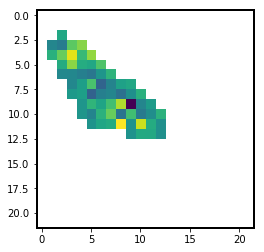

In [1515]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(ci)

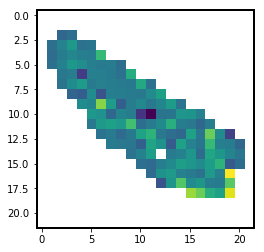

In [1516]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(zi)

In [1517]:
newmeangridnew = np.nanmean([zi],axis = 0)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


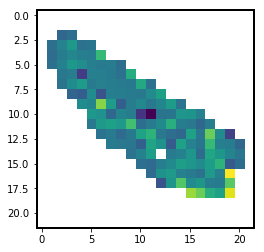

In [1518]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(newmeangridnew)

In [1519]:
griddednewlate = np.where(grid == True, newmeangridnew, grid)

In [1520]:
d = np.where(np.isnan(griddednewlate), 0, griddednewlate) # SPRING

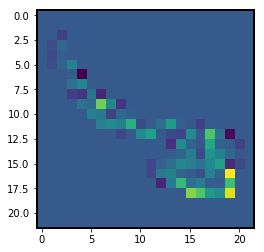

In [1521]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(d)

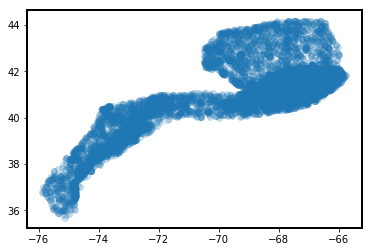

In [1522]:
plt.scatter(concat_lon_summer, concat_lat_summer, alpha = 0.2)

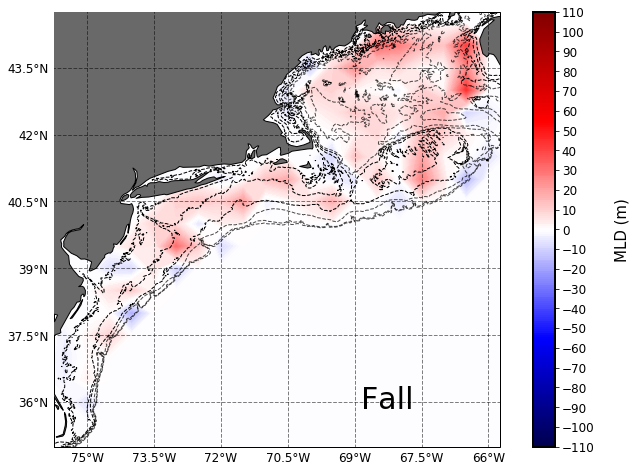

In [1525]:
from matplotlib.pyplot import * ; import cartopy.feature as cfeature

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-75.75, -65.75, 35, 44.75], ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='black', alpha=0.5, linestyle='--', zorder = 20)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12, 'color': 'black'}
gl.ylabel_style = {'size': 12, 'color': 'black'}

plt.text(-68.85, 35.85, 'Fall', dict(size=30))

cf = plt.contourf(xi,yi,d, np.arange(-110, 111,1), cmap = 'seismic')
# cf = plt.contourf(xi,yi,d,np.arange(0, 120,1), cmap = 'ocean_r')
# cf = plt.contourf(xi,yi,d,np.arange(-0.62, 0.62,0.005), cmap = 'seismic')
# cf = plt.contourf(xi,yi,d,np.arange(0, 122,2), cmap = 'ocean_r')
# cf = plt.contourf(xi,yi,d,np.arange(0, 50,0.5), cmap = 'ocean_r')
# ax.contour(xi, yi, d, levels=12, linewidths=1,colors='white',zorder=5,)
ax.contour(lonNC, latNC, depthNC, [-300,-200,-100], linewidths=1,colors='black', alpha = 0.7,zorder=5) #alpha = 0.7
ax.contour(lonNC, latNC, depthNC, [-75,-50,-25], linewidths=1,colors='black',zorder=5)

feature = cfeature.NaturalEarthFeature(name='coastline', category='physical',scale='50m',edgecolor='black', facecolor='dimgray')
ax.add_feature(feature,zorder=10)
cbar = plt.colorbar(cf, ax=ax)
cbar.ax.get_yaxis().labelpad = 20
cbar.ax.set_ylabel('MLD (m)', rotation=90, fontsize = 15)
cbar.set_ticks([-110,-100,-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90,100,110])
cbar.ax.tick_params(labelsize=12)

plt.savefig('seasonal_WGoM')

plt.show()

In [1422]:
print(np.nanmax(d))
print(np.nanmin(d))

109.67840735053883
-8.655559447527146


In [130]:
# pointstouse = []; seasonalmean = []
# finallatestdepth = []; finalfinaldepth = []; finalfinalratio = []; filteredMLDlist = []
# meanfilteredMLDlist = []; stdfilteredMLDlist = []; bananasplitmean = []
# bananasplitstd = [];floormean = [];floorstd = []; latfinal = []; lonfinal = []; ratiofinal = []
# bottomdfinal = []; filteredfloorslist = [];zi_listofarrays = []
yearwithdata = []; seasonalmean = []; finallatestdepth = [] ; pointstouse_small = []; pointstouse = []
years = []; correctedwospatdiffstd = []; ratio_of_water_column_std_corrected = []; seasonalstd = []; yearwithdata = []
seasonyeardepth = []; countwithinpolygon = []; correctedwospatdiffmean = [] ; latlat = []; ydyd = []
ratio_of_water_column = []; now = []; later = []; ratio_of_water_column_corrected = [] ; lonlon = []
seasonalmean = [] 
for year in range(1993,2019):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    counterii = []
    lat_intermediate = []; lon_intermediate = []; yd_intermediate = []
    p_intermediate = []; t_intermediate = []; sal_intermediate = []
    floor_intermediate = []; surfaceval_list = []
    seasonyeardepth2 = []; ratio_of_water_column2 = []
    
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        gear = npfile[i]['gear']
        floordepth = npfile[i]['depth']
#         if (yd > 334 and yd <= 365 and floordepth <= 200) or (yd >= 0 and yd <= 59 and floordepth <= 200) :
#         if yd > 59 and yd <= 151 and floordepth <= 200:
#         if (yd > 334 and yd <= 365) or (yd >= 0 and yd <= 59) :
        if yd > 120 and yd <= 151 and floordepth <= 200:  # and floordepth <= 200
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])
            sal_intermediate.append(npfile[i]['s'])
            floor_intermediate.append(npfile[i]['depth'])
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate,'depth': floor_intermediate, 's': sal_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate,'date': yd_intermediate})
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if isinstance(month_df['p'].iloc[ii], int) or isinstance(month_df['p'].iloc[ii], float) or isinstance(month_df['t'].iloc[ii], int) or isinstance(month_df['t'].iloc[ii], float):
            pass
        elif polygon_x.contains(point) == True:
            CT = gsw.CT_from_pt(month_df['s'].iloc[ii],month_df['t'].iloc[ii])
            DENS = gsw.sigma0(month_df['s'].iloc[ii],CT)
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'t': month_df['t'].iloc[ii], 's': month_df['s'].iloc[ii], 'CT': CT, 'DENSMLD': DENS}) 
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            countwithinpolygon.append(1)
            l=[i for i in df_final[0] if i<=4] 
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for iii in range(len(l)):
                    val = df_final[4][iii]
                    numrange.append(iii)
                    surfaceval.append(val)            
            surfacevalmean = statistics.mean(surfaceval)
            densfin = []; tempfin = []; pressurefin = []; salfin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
                salfin.append(df_final[2][iii])
                densfin.append(df_final[4][iii])
            d = {'temp': list(reversed(tempfin)), 'sal': list(reversed(salfin)), 'pressure': list(reversed(pressurefin)),'density': list(reversed(densfin))}
            dunreversed = {'temp': list(tempfin), 'sal': list(salfin), 'pressure': list(pressurefin), 'density': list(densfin)}
            dffinunreversed = pd.DataFrame(dunreversed)
            dffin = pd.DataFrame(d)
            
            for ix in range(len(dffinunreversed)):
                if dffinunreversed.at[ix,'density'] >= (surfacevalmean - 0.03) and dffinunreversed.at[ix,'density'] <= (surfacevalmean + 0.03):
                    if dffinunreversed.at[len(dffinunreversed)-1,'density'] <= (surfacevalmean + 0.03) and dffinunreversed.at[len(dffinunreversed)-1,'density'] >= (surfacevalmean - 0.03):
                        looknow = list(dffinunreversed['density'].values)
                        looknow2 = [i for i in looknow if i >= (surfacevalmean + 0.03)]
                        looknow3 = [i for i in looknow if i <= (surfacevalmean - 0.03)]
                        if len(looknow2) == 0 and len(looknow3) == 0:
                            if dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                                if dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                                    seasonyeardepth.append(month_df['depth'].iloc[ii])
                                    seasonyeardepth2.append(month_df['depth'].iloc[ii])
                                    ratio_of_water_column.append(1.0)
                                    ratio_of_water_column2.append(1.0)
                                    latlat.append(month_df['lat'].iloc[ii])
                                    lonlon.append(month_df['lon'].iloc[ii])
                                    ydyd.append(month_df['day'].iloc[ii])
                                    years.append(year)
                                    counterii.append(ii)
                                    break
                                else:
                                    seasonyeardepth.append(month_df['depth'].iloc[ii])
                                    seasonyeardepth2.append(month_df['depth'].iloc[ii])
                                    ratio_of_water_column.append(1.0)
                                    ratio_of_water_column2.append(1.0)
                                    latlat.append(month_df['lat'].iloc[ii])
                                    lonlon.append(month_df['lon'].iloc[ii])
                                    ydyd.append(month_df['day'].iloc[ii])
                                    years.append(year)
                                    counterii.append(ii)
                                    break
                            else:
                                if dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                                    seasonyeardepth.append(month_df['depth'].iloc[ii])
                                    seasonyeardepth2.append(month_df['depth'].iloc[ii])
                                    ratio_val = 1.0
                                    ratio_of_water_column.append(ratio_val)
                                    ratio_of_water_column2.append(ratio_val)
                                    latlat.append(month_df['lat'].iloc[ii])
                                    lonlon.append(month_df['lon'].iloc[ii])
                                    ydyd.append(month_df['day'].iloc[ii])
                                    years.append(year)
                                    counterii.append(ii)
                                    break
                        else:
                            if dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                                for ix in range(len(dffinunreversed['density'])):
                                    if dffinunreversed.at[ix,'density'] >= (surfacevalmean - 0.03) and dffinunreversed.at[ix,'density'] <= (surfacevalmean + 0.03):
                                        pass
                                    else:
                                        if dffinunreversed.at[ix,'pressure'] >= 5:
                                            seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                            seasonyeardepth2.append(dffinunreversed.at[ix,'pressure'])
                                            ratio_val = 1.0
                                            ratio_of_water_column.append(ratio_val)
                                            ratio_of_water_column2.append(ratio_val)
                                            latlat.append(month_df['lat'].iloc[ii])
                                            lonlon.append(month_df['lon'].iloc[ii])
                                            ydyd.append(month_df['day'].iloc[ii])
                                            years.append(year)
                                            counterii.append(ii)
                                            break
                                        else:
                                            break
                                break 
                    else:
                        if dffinunreversed.at[ix,'density'] <= (surfacevalmean - 0.03) or dffinunreversed.at[ix,'density'] >= (surfacevalmean + 0.03):
                            if dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                                pass
                            else:
                                seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                seasonyeardepth2.append(dffinunreversed.at[ix,'pressure'])
                                ratio_val = (dffinunreversed.at[ix,'pressure'])/(month_df['depth'].iloc[ii])
                                ratio_of_water_column.append(ratio_val)
                                ratio_of_water_column2.append(ratio_val)
                                latlat.append(month_df['lat'].iloc[ii])
                                lonlon.append(month_df['lon'].iloc[ii])
                                ydyd.append(month_df['day'].iloc[ii])
                                years.append(year)
                                counterii.append(ii)
                                break           
                        else: 
                            if dffinunreversed.at[ix,'density'] >= (surfacevalmean + 0.03) or dffinunreversed.at[ix,'density'] <= (surfacevalmean - 0.03):
                                seasonyeardepth.append('pass4')
                                break
#                                 pass
                elif dffinunreversed.at[ix,'density'] <= (surfacevalmean - 0.03) or dffinunreversed.at[ix,'density'] >= (surfacevalmean + 0.03):
                    if dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                        pass
                    else:
                        for ix in range(len(dffinunreversed['density'])):
                            if dffinunreversed.at[ix,'density'] >= (surfacevalmean - 0.03) and dffinunreversed.at[ix,'density'] <= (surfacevalmean + 0.03):
                                pass
                            else:
                                if dffinunreversed.at[ix,'pressure'] >= 5.0:
                                    seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                    seasonyeardepth2.append(dffinunreversed.at[ix,'pressure'])
                                    ratio_val = (dffinunreversed.at[ix,'pressure'])/(month_df['depth'].iloc[ii])
                                    ratio_of_water_column.append(ratio_val)
                                    ratio_of_water_column2.append(ratio_val)
                                    latlat.append(month_df['lat'].iloc[ii])
                                    lonlon.append(month_df['lon'].iloc[ii])
                                    ydyd.append(month_df['day'].iloc[ii])
                                    years.append(year)
                                    counterii.append(ii)
                                    break
                                else:
                                    break
                        break
                else: 
                    seasonyeardepth.append('pass9')
                    break
                            
    correctedwospatdiffmean.append(np.mean(seasonyeardepth2))
    correctedwospatdiffstd.append(np.std(seasonyeardepth2))
    ratio_of_water_column_corrected.append(np.mean(ratio_of_water_column2))
    ratio_of_water_column_std_corrected.append(np.std(ratio_of_water_column2))
    
#     inlat = []; inlon = []; date = []
#     for timer in counterii:
#         inlat.append(newdf['lat'][timer])
#         inlon.append(newdf['lon'][timer])
#         date.append(newdf['date'][timer])                 
#     if len(seasonyeardepth2) > 0:    
#         if len(seasonyeardepth2) == 1:  
#             std = 0
#             seasonalstd.append(std)
#         else:
#             seasonalstd.append(seasonyeardepth2)
# #         seasonalmean.append(statistics.mean(seasonyeardepth2))
# #         full = pd.DataFrame({'mld': seasonyeardepth,'lat': lat, 'lon': lon, 'date': date, 'year_df': year}) 
# #         finallatestdepth.append(seasonyeardepth2)
# #         year_newfinal = full['year_df'].tolist()
# #         year_final.append(year_newfinal)

# ---- 
#     inlat = []; inlon = []; date = []
#     for timer in counterii:
#         inlat.append(newdf['lat'][timer])
#         inlon.append(newdf['lon'][timer])
#         date.append(newdf['date'][timer])                 
#     if len(seasonyeardepth) > 0:    
# #         if len(seasonyeardepth) == 1:  
# #             std = 0
# #             seasonalstd.append(std)
# #         else:
# #             seasonalstd.append(statistics.stdev(seasonyeardepth))
#         yearwithdata.append(year)
#         seasonalmean.append(np.mean(seasonyeardepth))
# #         seasonalstd.append(statistics.stdev(seasonyeardepth))
#         full = pd.DataFrame({'mld': seasonyeardepth,'lat': latlat, 'lon': lonlon, 'date': ydyd}) 
#         finallatestdepth.append(seasonyeardepth)
#         print(year)
# #         print(seasonyeardepth)
#     pointstousenow = []
#     for x in range(len(date)):
#         use=DS.sel(time=slice('{}-05-01'.format(year),'{}-05-31'.format(year))) 
#         locate_date = use.sel(time=use.time.dt.day==(date[x])-120)
#         mld_locate_date = locate_date.mlotst.values[0]
# #         mld_locate_date = locate_date.si10.values[0]

# #         mld_locate_date = locate_date.mlotst.values
    
#         lat = np.array(locate_date.mlotst['latitude'][:])
#         long = np.array(locate_date.mlotst['longitude'][:])
    
#         lonneg = [float(i)*-1 for i in inlon]
#         distanceslat = []; distanceslon = []
#         for i in range(133):
#             distanceslat.append((inlat[x] - lat[i])**2)
#             index_min_lat = min(range(len(distanceslat)), key=distanceslat.__getitem__)
#         for ii in range(181):
#             distanceslon.append((lonneg[x] - long[ii])**2)
#             index_min_lon = min(range(len(distanceslon)), key=distanceslon.__getitem__)
#         lat_index_use, lon_index_use = index_min_lat, index_min_lon
#         pointstouse.append(mld_locate_date[lat_index_use, lon_index_use]) 
#         pointstousenow.append(mld_locate_date[lat_index_use, lon_index_use]) 
#     print(pointstousenow)
#     print(seasonyeardepth2)
#     pointstouse_small.append(np.mean(pointstousenow))
#     plt.scatter(pointstousenow, seasonyeardepth2)
#     plt.show()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [132]:
print(np.nanmean(correctedwospatdiffmean))

9.626018246655864


In [692]:
# print(np.nanmean(correctedwospatdiffmean))
# print(np.nanstd(correctedwospatdiffmean))

print(np.nanmean(pointstouse_small))
print(np.nanstd(pointstouse_small))

10.768174409866333
0.479713747886967


In [680]:
print(len(pointstouse))
print(len(seasonyeardepth))

127
127


In [714]:
# polygon_w
wglorys_mean = [42.65234708786011, 37.72557353973389, 28.624765176039475, 18.985302238464357, 11.076265749724016, 10.702166438102722, 
              10.528713279300266, 10.809139208360152, 14.358660173416137, 21.810295, 34.46488796580922, 31.048706769943237]
wglorys_std = [9.466707034177368, 12.429314795408299, 10.886965061514227, 4.397261061818549, 0.6910116902131564, 0.2441084200294187, 
             0.0007138053509482347, 0.5437995449441829, 4.121442553605896, 5.4127846, 6.835162773199448, 9.320892315900126]
wavgdiff_densminusglorys = [7.296282117188131, 8.547545024107128, 16.052261551960147, 18.824420155069102, 14.15728645503521, 12.025876312255859, 
                          3.667283345961712, 5.606223349008941, 4.240408460299174, 4.105442633294755, -1.1094780743122101, -0.13749973990700462]
wavgdiff_std_densminusglorys = [22.126405703353008, 24.62996198410742, 23.151605083907437, 23.44788634473982, 21.906632338113724, 20.83741019822908, 
                              15.459124088212633, 16.452318200847806, 15.339396755420099, 18.143619161072433, 20.06589847626228, 18.68063772975762]
wr_value_diff = [0.494454502058009, 0.4217194244017065, 0.40652241388693294, 0.290945, 0.1442515530344492, 0.009079261282582459, 
               0.035908365112438514, 0.0012705587157777355, 0.16172909749613343, 0.23736122915462332, 0.33564532628507776, 0.423962773094962]


In [737]:
wd_abs_c_mean=  [45.83823674901097, 42.75448276959393, 46.41360855402116, 35.87923949936301, 25.241292717835513, 24.726529068906103, 11.124369348628115, 15.406051341171842, 18.0617233106939, 25.85403515317611, 33.39530639725829, 30.3231981981982]
wd_abs_c_std=  [12.327934616773906, 14.224494140418363, 7.840212850517012, 5.526455694639437, 10.157342482158723, 8.168108234836529, 6.030907418129967, 3.236505794550853, 6.132745233153801, 4.907529527038556, 7.376068493946898, 10.025220321222648]

In [739]:
wabs_c_diff = np.asarray([x1 - x2 for (x1, x2) in zip(wd_abs_c_mean, wglorys_mean)])
wabs_c_diff_std = np.asarray([x1 - x2 for (x1, x2) in zip(wd_abs_c_std, wglorys_std)])

In [740]:
print(wabs_c_diff)
print(np.mean(wabs_c_diff))
print(np.min(wabs_c_diff))
print(np.max(wabs_c_diff))

[ 3.18588966  5.02890923 17.78884338 16.89393726 14.16502697 14.02436263
  0.59565607  4.59691213  3.70306314  4.04374015 -1.06958157 -0.72550857]
6.85260420675863
-1.0695815685509302
17.788843377981685


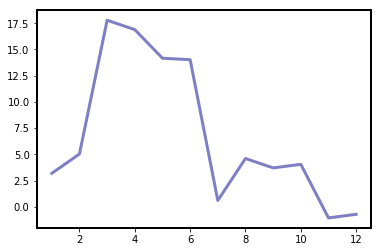

In [743]:
plt.plot(month, wabs_c_diff, linestyle='-', color='darkblue', linewidth=3,alpha = 0.5, zorder= 30)
plt.show()

In [715]:
month = [1,2,3,4,5,6,7,8,9,10,11,12]

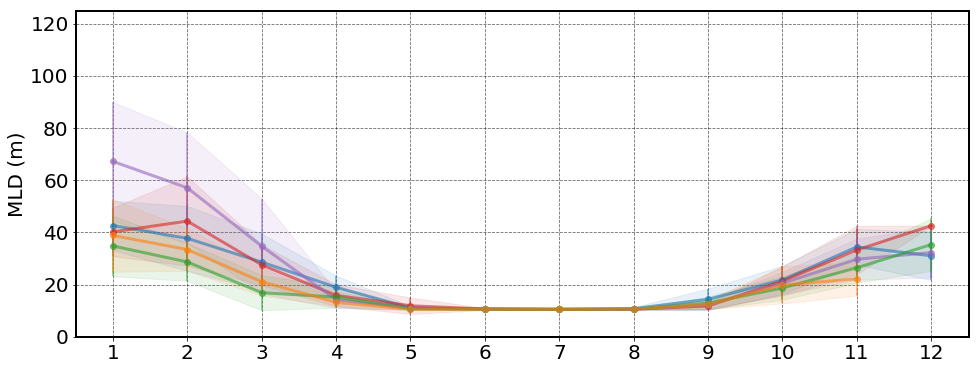

In [732]:
plt.figure(figsize=(16,6))
plt.ylim(0,125)
plt.xlim(0.5,12.5)
plt.plot(month, wglorys_mean, linestyle='-', color='tab:blue', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,wglorys_mean, wglorys_std,linestyle='None', marker='o',color='tab:blue',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(month, np.asarray(wglorys_mean) - np.asarray(wglorys_std), np.asarray(wglorys_mean) + np.asarray(wglorys_std),color = 'tab:blue', alpha = 0.1,zorder = 30)

plt.plot(month, yglorys_mean, linestyle='-', color='tab:red', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,yglorys_mean, yglorys_std,linestyle='None', marker='o',color='tab:red',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(month, np.asarray(yglorys_mean) - np.asarray(yglorys_std), np.asarray(yglorys_mean) + np.asarray(yglorys_std),color = 'tab:red', alpha = 0.1,zorder = 30)

plt.plot(month, tglorys_mean, linestyle='-', color='tab:purple', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,tglorys_mean, tglorys_std,linestyle='None', marker='o',color='tab:purple',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(month, np.asarray(tglorys_mean) - np.asarray(tglorys_std), np.asarray(tglorys_mean) + np.asarray(tglorys_std),color = 'tab:purple', alpha = 0.1,zorder = 30)

plt.plot(month, xglorys_mean, linestyle='-', color='tab:green', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month,xglorys_mean, xglorys_std,linestyle='None', marker='o',color='tab:green',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(month, np.asarray(xglorys_mean) - np.asarray(xglorys_std), np.asarray(xglorys_mean) + np.asarray(xglorys_std),color = 'tab:green', alpha = 0.1,zorder = 30)

plt.plot(month_short, vglorys_mean, linestyle='-', color='tab:orange', linewidth=3,alpha = 0.6, zorder= 30)
plt.errorbar(month_short,vglorys_mean, vglorys_std,linestyle='None', marker='o',color='tab:orange',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(month_short, np.asarray(vglorys_mean) - np.asarray(vglorys_std), np.asarray(vglorys_mean) + np.asarray(vglorys_std),color = 'tab:orange', alpha = 0.1,zorder = 30)

plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.ylabel('MLD (m)', fontsize = 20)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 20) 
plt.yticks([0,20,40,60,80,100,120], fontsize = 20) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.6)
plt.show()

In [722]:
# polygon_y
yglorys_mean = [40.210606813430786, 44.344591753823416, 27.558424404689244, 15.885846098264059, 11.903779474894206, 10.634979082190473, 
              10.528885841369629, 10.560018766494025, 11.818825340270996, 21.370383342107136, 33.275755842526756, 42.60383987426758]
yglorys_std = [9.286893672936307, 17.114894576814788, 7.781422310997792, 4.159979815476344, 3.15560429372382, 0.37160000905497664, 
             0.0, 0.07921851469467206, 1.127960406701049, 5.593036795560299, 9.289632867047025, 0.0]
yavgdiff_densminusglorys = [-5.338083396911621, 3.963059886557157, 7.419712878917825, 6.083371296613339, 1.809141285643984, -0.0409200301537147, 
                          -2.341385841369629, -2.309566001466659, 0.18744929157086274, 1.60311778789128, -4.064470874476553, -12.603841400146484]
yavgdiff_std_densminusglorys = [25.47301735508931, 34.10765452100942, 24.268628005863153, 16.3287849509104, 9.69565721149433, 8.766198049088198, 
                              3.3270122357254213, 4.0360145722582494, 12.855266459114398, 12.090981945508947, 16.20075411822687, 7.580928165091561]
yr_value_diff = [0.26968449083268986, 0.35094599219284717, 0.3606563627040192, 0.31050821876954426, 0.04390188120012677, 0.012191630732888214, 
               np.nan, -0.03327325851541257, 0.08544158728595572, 0.4068546547459115, 0.3873935612356584, -0.1918553037102807]


In [744]:
yd_abs_c_mean=  [37.4054788961039, 49.02433281004709, 36.287373737373734, 22.393759153309315, 14.620187848986397, 10.207197940891911, 7.5814393939393945, 8.259105184269117, 12.078413764904102, 21.823298262986924, 28.840066267937043, 30.0]
yd_abs_c_std=  [8.243153418213403, 20.377836772076403, 10.433328461159157, 6.247426041016723, 4.616539270465489, 2.923701645361102, 1.7682912802710025, 1.4091224864949916, 4.736405481501757, 7.330353390150115, 8.027020540647317, 0.0]


In [745]:
yabs_c_diff = np.asarray([x1 - x2 for (x1, x2) in zip(yd_abs_c_mean, yglorys_mean)])
yabs_c_diff_std = np.asarray([x1 - x2 for (x1, x2) in zip(yd_abs_c_std, yglorys_std)])

In [746]:
print(yabs_c_diff)
print(np.mean(yabs_c_diff))
print(np.min(yabs_c_diff))
print(np.max(yabs_c_diff))

[ -2.80512792   4.67974106   8.72894933   6.50791306   2.71640837
  -0.42778114  -2.94744645  -2.30091358   0.25958842   0.45291492
  -4.43568957 -12.60383987]
-0.18127361446494783
-12.603839874267578
8.72894933268449


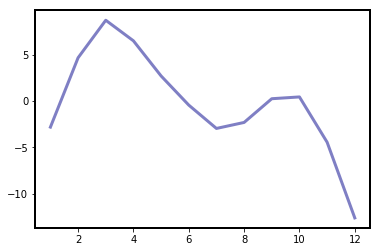

In [747]:
plt.plot(month, yabs_c_diff, linestyle='-', color='darkblue', linewidth=3,alpha = 0.5, zorder= 30)
plt.show()

In [748]:
# polygon_t
tglorys_mean = [67.208373436561, 57.0967116355896, 34.741600354512535, 14.200337741685951, 11.001784869602748, 10.665883852087934, 
              10.528886032104491, 10.563667479015532, 12.186286971682595, 20.53599, 29.744427100471828, 32.280001640319824]
tglorys_std = [22.751190134305602, 21.17309597141965, 18.217312958462813, 3.189496141689896, 0.6151081466518138, 0.36703590552994403, 
             5.7220458984375e-07, 0.1515024247855465, 1.8154259383821478, 4.3694024, 7.884711001312756, 9.556208126196566]
tavgdiff_densminusglorys = [11.224593909390002, 18.34847028121948, 17.54721842894683, 8.151120380096105, 1.4023058006711024, -1.020654334436597, 
                          -3.1775344900182776, -2.7293210297822954, 0.20413411999144496, 0.9492763468466829, -0.019056756841311664, -0.7207315379175646]
tavgdiff_std_densminusglorys = [31.97118226591719, 38.65747338047915, 40.935845842975084, 17.02964080384809, 8.306887893167325, 5.225915953505755, 
                              2.4628725945717878, 3.058354119349668, 6.328117937875577, 9.853706935618865, 18.161293678436426, 22.280180555916214]
tr_value_diff = [0.5533793747295507, 0.44380156519532804, 0.36778436327787367, 0.580607, 0.3520169223667568, 0.1102510352078684, 
               -1.6082016033428352e-16, 0.245924651479125, 0.20422647734217528, 0.485799, 0.336243, 0.22503975914163385]


In [749]:
td_abs_c_mean=  [78.03203036279959, 73.53574804529242, 47.382479557479556, 23.294586432719015, 13.137129320150612, 9.867960225861694, 7.5300814000814, 7.841594508152076, 13.917184828007779, 21.393340578297003, 30.31755305445674, 28.21045943304008]
td_abs_c_std=  [21.86766936154572, 23.409284992476564, 24.789553498603215, 8.782550482027169, 5.552413585115152, 2.772138883332934, 1.341694355784547, 1.1195258813667583, 5.8714902039481185, 4.401840498227291, 7.982790733944767, 12.883216166606223]




In [750]:
tabs_c_diff = np.asarray([x1 - x2 for (x1, x2) in zip(td_abs_c_mean, tglorys_mean)])
tabs_c_diff_std = np.asarray([x1 - x2 for (x1, x2) in zip(td_abs_c_std, tglorys_std)])


In [751]:
print(tabs_c_diff)
print(np.mean(tabs_c_diff))
print(np.min(tabs_c_diff))
print(np.max(tabs_c_diff))

[10.82365693 16.43903641 12.6408792   9.09424869  2.13534445 -0.79792363
 -2.99880463 -2.72207297  1.73089786  0.85735058  0.57312595 -4.06954221]
3.6421830527253274
-4.069542207279746
16.439036409702823


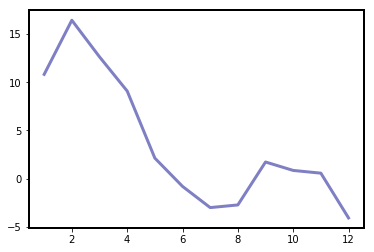

In [752]:
plt.plot(month, tabs_c_diff, linestyle='-', color='darkblue', linewidth=3,alpha = 0.5, zorder= 30)
plt.show()

In [753]:
# polygon_x
xglorys_mean = [34.8233585357666, 28.69018922533308, 16.878933747609455, 15.232476186752319, 10.768174409866333, 10.542459964752197, 10.528885841369629, 10.60020587318822, 12.94114237246306, 18.721862512476303, 
              26.45456886291504, 35.348089853922524]
xglorys_std = [11.606480722110211, 7.255996570863203, 6.720396362950421, 4.000465606025336, 0.479713747886967, 0.02979185738694183, 0.0, 0.1326087804068732, 2.451999044124021, 4.524662094542041, 
             5.7113744773281425, 10.081827011127075]
xavgdiff_densminusglorys = [2.577947257115291, 10.22975064497212, 10.940489677721233, 10.947974809959753, -0.73355038577773, -1.2540245102223566, -3.6409548068868705, -2.2043958113743707, 0.9218112622277211, 3.673258558817487, 
                          4.512768970836293, 2.65352328230695]
xavgdiff_std_densminusglorys = [17.539195400636935, 20.638377406201364, 17.270741903468974, 13.892365208192617, 6.477353744863417, 5.947704760294311, 1.972970592979277, 4.959786503965612, 6.8471356823738905, 11.681796439293525, 
                              15.296067777985916, 12.75192120699028]
xr_value_diff = [0.4899961436810365, 0.3864446651387224, 0.463862, 0.4665040722013387, 0.29868796460800295, 0.19746879850651375, 6.597365374442936e-17, 0.17091322809795464, 0.482888, 0.43283361728257197, 
               0.36088222421839145, 0.5179290147953529]


In [754]:
xd_abs_c_mean=  [48.66135129490393, 38.98122621961879, 27.10194874447916, 28.460179789080648, 9.626018246655864, 10.150006455633443, 6.814348672161172, 8.08471531822151, 14.199875849819259, 22.34921729247595, 31.106949119712848, 39.603508771929825]
xd_abs_c_std=  [11.401730026343996, 11.501141698557191, 10.934267582203343, 9.288503262806348, 2.6061400288919603, 4.002149380268777, 0.8460055436177472, 2.2926864545875265, 4.353555908629032, 5.338934802635864, 7.230314123112538, 8.27543543509976]





In [755]:
xabs_c_diff = np.asarray([x1 - x2 for (x1, x2) in zip(xd_abs_c_mean, xglorys_mean)])
xabs_c_diff_std = np.asarray([x1 - x2 for (x1, x2) in zip(xd_abs_c_std, xglorys_std)])


In [756]:
print(xabs_c_diff)
print(np.mean(xabs_c_diff))
print(np.min(xabs_c_diff))
print(np.max(xabs_c_diff))


[13.83799276 10.29103699 10.223015   13.2277036  -1.14215616 -0.39245351
 -3.71453717 -2.51549055  1.25873348  3.62735478  4.65238026  4.25541892]
4.467416532356471
-3.714537169208457
13.837992759137329


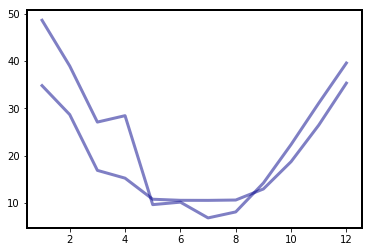

In [827]:
plt.plot(month, xglorys_mean, linestyle='-', color='darkblue', linewidth=3,alpha = 0.5, zorder= 30)
plt.plot(month, xd_abs_c_mean, linestyle='-', color='darkblue', linewidth=3,alpha = 0.5, zorder= 30)


plt.show()


In [727]:
month_short = [1,2,3,4,5,6,7,8,9,10,11]

In [758]:
# polygon_v
vglorys_mean = [38.83807479010688, 33.43087051028297, 21.11409652709961, 13.19173984527588, 10.595623461405436, 10.563592751820883, 10.531734466552734, 10.635929388158461, 12.397805213928223, 19.885058975219728, 
              22.198955736662214]
vglorys_std = [13.91420567629241, 8.108383978412988, 5.339232529223001, 1.4659800659279887, 0.15083419729033687, 0.07418966312064064, 0.010454852966300382, 0.19124329690413147, 1.8074753085484876, 7.0806348703436495, 
             6.392664829319695]
vavgdiff_densminusglorys = [4.604067459912367, 5.5140821972153296, 6.873993079418533, 10.674334165618175, -1.0547642830090644, -2.7423056860039705, -2.725188096790467, -2.6899978751850844, -0.861218974813316, 0.1089446151140824, 
                          1.2299226999282837]
vavgdiff_std_densminusglorys = [31.78922395118986, 27.015949853284244, 20.60813228284296, 16.367026661969206, 6.408789240138678, 2.8958190290768235, 2.75104721988468, 2.8769253476163454, 5.694477237242094, 11.914176108059683, 
                              14.801490139893398]
vr_value_diff = [0.20804159900272567, 0.41744531318979833, 0.4360025774222513, 0.27527082029972283, 0.025206516364848375, 0.059575805236045644, -0.006490052657827904, -0.10053610679820811, 0.3720192028450652, 0.5633976738186067, 
               0.2552990984549442]


In [759]:
vd_abs_c_mean=  [41.18097860791826, 39.40649046790143, 27.990836704857966, 25.369307692307693, 9.338449766903913, 7.501564077551284, 7.3946797841023, 7.775943111180119, 11.577268568611348, 21.501907001044934, 23.103191139875538]
vd_abs_c_std=  [8.801982286134864, 8.966199617177182, 7.724028550304355, 4.980559843534619, 2.9583612355527196, 1.2461921462057928, 1.3852946095974816, 1.2753362344087815, 2.0306952676415646, 8.409098130683525, 6.8875821017656005]





In [772]:
vabs_c_diff = np.asarray([x1 - x2 for (x1, x2) in zip(vd_abs_c_mean, vglorys_mean)])
vabs_c_diff_std = np.asarray([x1 - x2 for (x1, x2) in zip(vd_abs_c_std, vglorys_std)])



In [773]:
print(vabs_c_diff)
print(np.mean(vabs_c_diff))
print(np.min(vabs_c_diff))
print(np.max(vabs_c_diff))


[ 2.34290382  5.97561996  6.87674018 12.17756785 -1.25717369 -3.06202867
 -3.13705468 -2.85998628 -0.82053665  1.61684803  0.9042354 ]
1.7051941141583422
-3.137054682450434
12.177567847031813


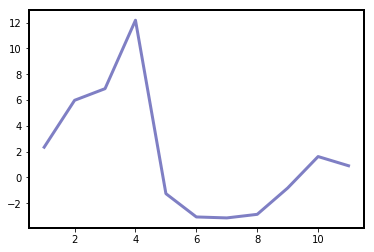

In [777]:
plt.plot(month_small, vabs_c_diff, linestyle='-', color='darkblue', linewidth=3,alpha = 0.5, zorder= 30)
plt.show()


In [824]:
month_small = [1,2,3,4,5,6,7,8,9,10,11]

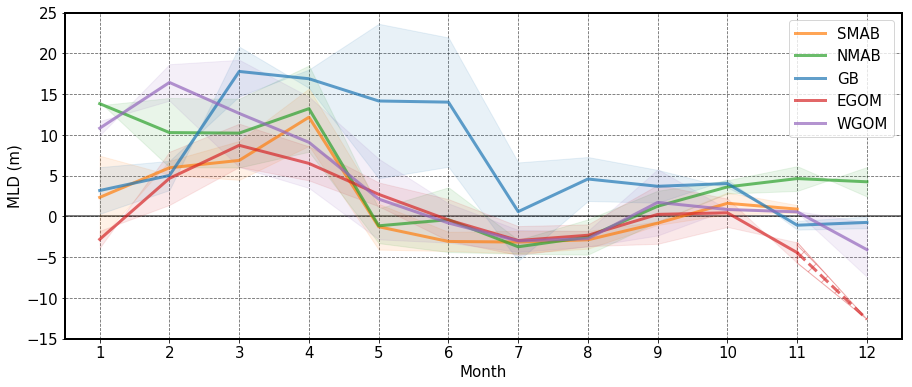

In [826]:
plt.figure(figsize=(15,6))
plt.figure(1)

plt.ylim(-15,25)
plt.xlim(0.5,12.5)

plt.plot(month_small, vabs_c_diff, linestyle='-', color='tab:orange', linewidth=3,alpha = 0.7, zorder= 30, label = 'SMAB')
plt.fill_between(month_small, np.asarray(vabs_c_diff) - np.asarray(vabs_c_diff_std), np.asarray(vabs_c_diff) + np.asarray(vabs_c_diff_std),color = 'tab:orange', alpha = 0.10,zorder = 30)

plt.plot(month, xabs_c_diff, linestyle='-', color='tab:green', linewidth=3,alpha = 0.7, zorder= 30,label = 'NMAB')
plt.fill_between(month, np.asarray(xabs_c_diff) - np.asarray(xabs_c_diff_std), np.asarray(xabs_c_diff) + np.asarray(xabs_c_diff_std),color = 'tab:green', alpha = 0.10,zorder = 30)

plt.plot(month, wabs_c_diff, linestyle='-', color='tab:blue', linewidth=3,alpha = 0.7, zorder= 30, label = 'GB')
plt.fill_between(month, np.asarray(wabs_c_diff) - np.asarray(wabs_c_diff_std), np.asarray(wabs_c_diff) + np.asarray(wabs_c_diff_std),color = 'tab:blue', alpha = 0.10,zorder = 30)

plt.plot([11,12], yabs_c_diff[10:12], linestyle='--', color='tab:red', linewidth=3,alpha = 0.7, zorder= 30)
plt.fill_between([11,12], np.asarray(yabs_c_diff[10:12]) - np.asarray(yabs_c_diff_std[10:12]), np.asarray(yabs_c_diff[10:12]) + np.asarray(yabs_c_diff_std[10:12]),facecolor='none', hatch="X", edgecolor="tab:red", alpha = 0.4,zorder = 30)

plt.plot(month[0:11], yabs_c_diff[0:11], linestyle='-', color='tab:red', linewidth=3,alpha = 0.7, zorder= 30, label = 'EGOM')
plt.fill_between(month[0:11], np.asarray(yabs_c_diff[0:11]) - np.asarray(yabs_c_diff_std[0:11]), np.asarray(yabs_c_diff[0:11]) + np.asarray(yabs_c_diff_std[0:11]),color = 'tab:red', alpha = 0.10,zorder = 30)

plt.plot(month, tabs_c_diff, linestyle='-', color='tab:purple', linewidth=3,alpha = 0.7, zorder= 30, label = 'WGOM')
plt.fill_between(month, np.asarray(tabs_c_diff) - np.asarray(tabs_c_diff_std), np.asarray(tabs_c_diff) + np.asarray(tabs_c_diff_std),color = 'tab:purple', alpha = 0.10,zorder = 30)

plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 15) 
plt.yticks([-15,-10,-5,0,5,10,15,20,25], fontsize = 15) 
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.6)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('MLD (m)', fontsize = 15)
plt.axhline(y=0, color='black', linestyle='-',linewidth= 2, alpha = 0.5)
plt.legend(loc='upper right', fontsize = 15)

plt.savefig('seasonal_EGoM')

plt.show()

In [1595]:
slope, intercept, r_value, p_value, std_err = stats.linregress(td_abs_c_mean,tglorys_mean)

In [1598]:
print(p_value)
print(r_value)

3.371523487420776e-08
0.9786489797848961


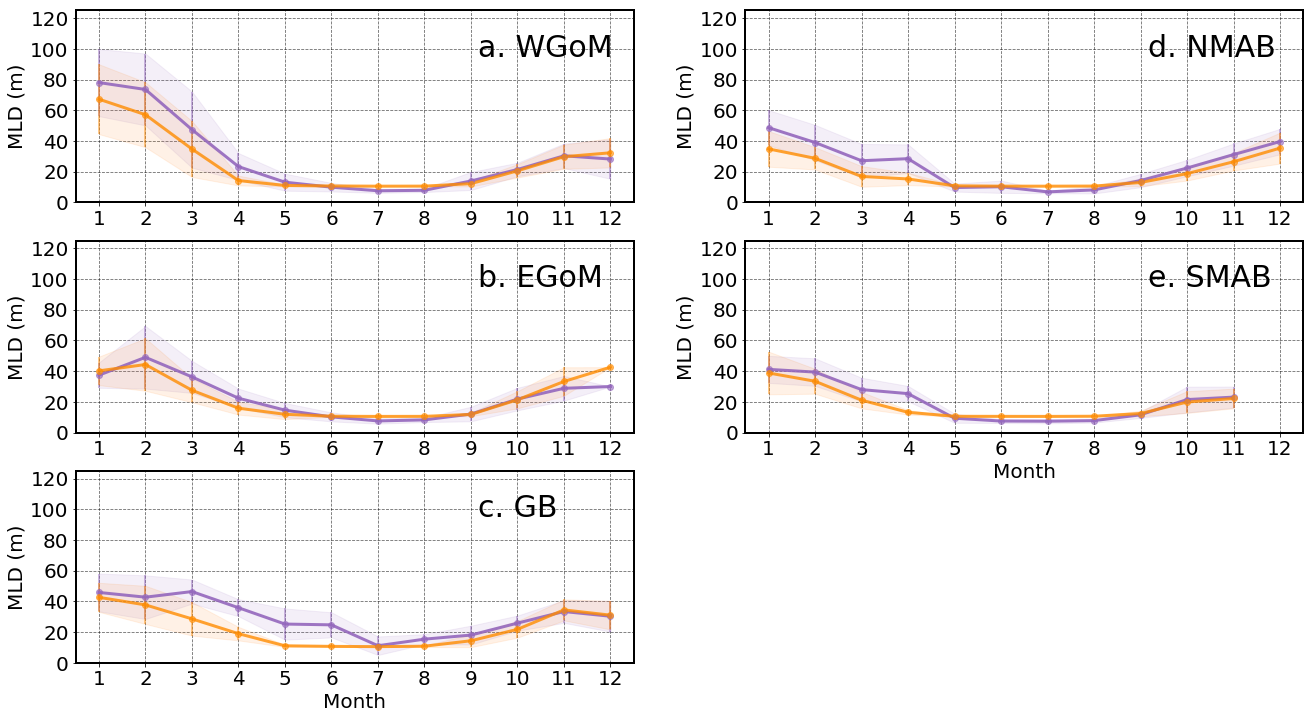

In [845]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(22,12))
plt.figure(1)

plt.subplot(321) # Western Gulf of Maine
plt.ylim(0,125)
plt.xlim(0.5,12.5)
plt.plot(month, td_abs_c_mean, linestyle='-', color='tab:purple', linewidth=3,alpha = 0.9, zorder= 30)
plt.errorbar(month,td_abs_c_mean, td_abs_c_std,linestyle='None', marker='o',color='tab:purple',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(month, np.asarray(td_abs_c_mean) - np.asarray(td_abs_c_std), np.asarray(td_abs_c_mean) + np.asarray(td_abs_c_std),color = 'tab:purple', alpha = 0.1,zorder = 30)

plt.plot(month, tglorys_mean, linestyle='-', color='darkorange', linewidth=3,alpha = 0.8, zorder= 30)
plt.errorbar(month,tglorys_mean, tglorys_std,linestyle='None', marker='o',color='darkorange',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(month, np.asarray(tglorys_mean) - np.asarray(tglorys_std), np.asarray(tglorys_mean) + np.asarray(tglorys_std),color = 'tab:orange', alpha = 0.1,zorder = 30)

plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.ylabel('MLD (m)', fontsize = 20)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 20) 
plt.yticks([0,20,40,60,80,100,120], fontsize = 20) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.text(9.15, 95, 'a. WGoM', dict(size=30))
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.6)

plt.subplot(322) # Northern MAB
plt.ylim(0,125)
plt.xlim(0.5,12.5)
plt.plot(month, xd_abs_c_mean, linestyle='-', color='tab:purple', linewidth=3,alpha = 0.9, zorder= 30)
plt.errorbar(month,xd_abs_c_mean, xd_abs_c_std,linestyle='None', marker='o',color='tab:purple',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(month, np.asarray(xd_abs_c_mean) - np.asarray(xd_abs_c_std), np.asarray(xd_abs_c_mean) + np.asarray(xd_abs_c_std),color = 'tab:purple', alpha = 0.1,zorder = 30)

plt.plot(month, xglorys_mean, linestyle='-', color='darkorange', linewidth=3,alpha = 0.8, zorder= 30)
plt.errorbar(month,xglorys_mean, xglorys_std,linestyle='None', marker='o',color='darkorange',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(month, np.asarray(xglorys_mean) - np.asarray(xglorys_std), np.asarray(xglorys_mean) + np.asarray(xglorys_std),color = 'tab:orange', alpha = 0.1,zorder = 30)

plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.ylabel('MLD (m)', fontsize = 20)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 20) 
plt.yticks([0,20,40,60,80,100,120], fontsize = 20) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.text(9.15, 95, 'd. NMAB', dict(size=30))
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.6)

# # # verts = np.array([[-1, -1], [1, -1], [1, 1], [-1, -1]])
plt.subplot(323) # Eastern Gulf of Maine
plt.ylim(0,125)
plt.xlim(0.5,12.5)
plt.plot(month, yd_abs_c_mean, linestyle='-', color='tab:purple', linewidth=3,alpha = 0.9, zorder= 30)
plt.errorbar(month,yd_abs_c_mean, yd_abs_c_std,linestyle='None', marker='o',color='tab:purple',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(month, np.asarray(yd_abs_c_mean) - np.asarray(yd_abs_c_std), np.asarray(yd_abs_c_mean) + np.asarray(yd_abs_c_std),color = 'tab:purple', alpha = 0.1,zorder = 30)

plt.plot(month, yglorys_mean, linestyle='-', color='darkorange', linewidth=3,alpha = 0.8, zorder= 30)
plt.errorbar(month,yglorys_mean, yglorys_std,linestyle='None', marker='o',color='darkorange',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(month, np.asarray(yglorys_mean) - np.asarray(yglorys_std), np.asarray(yglorys_mean) + np.asarray(yglorys_std),color = 'tab:orange', alpha = 0.1,zorder = 30)

plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.ylabel('MLD (m)', fontsize = 20)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 20) 
plt.yticks([0,20,40,60,80,100,120], fontsize = 20) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.text(9.15, 95, 'b. EGoM', dict(size=30))
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.6)

plt.subplot(324) # Southern MAB
plt.ylim(0,125)
plt.xlim(0.5,12.5)
plt.plot(month_short, vd_abs_c_mean, linestyle='-', color='tab:purple', linewidth=3,alpha = 0.9, zorder= 30)
plt.errorbar(month_short,vd_abs_c_mean, vd_abs_c_std,linestyle='None', marker='o',color='tab:purple',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(month_short, np.asarray(vd_abs_c_mean) - np.asarray(vd_abs_c_std), np.asarray(vd_abs_c_mean) + np.asarray(vd_abs_c_std),color = 'tab:purple', alpha = 0.1,zorder = 30)

plt.plot(month_short, vglorys_mean, linestyle='-', color='darkorange', linewidth=3,alpha = 0.8, zorder= 30)
plt.errorbar(month_short,vglorys_mean, vglorys_std,linestyle='None', marker='o',color='darkorange',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(month_short, np.asarray(vglorys_mean) - np.asarray(vglorys_std), np.asarray(vglorys_mean) + np.asarray(vglorys_std),color = 'tab:orange', alpha = 0.1,zorder = 30)

plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.ylabel('MLD (m)', fontsize = 20)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 20) 
plt.yticks([0,20,40,60,80,100,120], fontsize = 20) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.text(9.15, 95, 'e. SMAB', dict(size=30))
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.6)
plt.xlabel('Month', fontsize = 20)


plt.subplot(325) # Georges Bank
plt.ylim(0,125)
plt.xlim(0.5,12.5)
plt.plot(month, wd_abs_c_mean, linestyle='-', color='tab:purple', linewidth=3,alpha = 0.9, zorder= 30)
plt.errorbar(month,wd_abs_c_mean, wd_abs_c_std,linestyle='None', marker='o',color='tab:purple',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(month, np.asarray(wd_abs_c_mean) - np.asarray(wd_abs_c_std), np.asarray(wd_abs_c_mean) + np.asarray(wd_abs_c_std),color = 'tab:purple', alpha = 0.1,zorder = 30)

plt.plot(month, wglorys_mean, linestyle='-', color='darkorange', linewidth=3,alpha = 0.8, zorder= 30)
plt.errorbar(month,wglorys_mean, wglorys_std,linestyle='None', marker='o',color='darkorange',alpha= 0.6, markersize=6, zorder = 30)
plt.fill_between(month, np.asarray(wglorys_mean) - np.asarray(wglorys_std), np.asarray(wglorys_mean) + np.asarray(wglorys_std),color = 'tab:orange', alpha = 0.1,zorder = 30)

plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.2)
plt.ylabel('MLD (m)', fontsize = 20)
plt.xlabel('Month', fontsize = 20)


plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], fontsize = 20) 
plt.yticks([0,20,40,60,80,100,120], fontsize = 20) 
mpl.rcParams['axes.linewidth'] = 2
plt.axhline(y=0, color='black', linestyle='-',alpha = 0.5)
plt.text(9.15, 95, 'c. GB', dict(size=30))
plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.6)

plt.savefig('seasonal_EGoM')


# plt.subplot(326)
# # plt.plot(month, mld_mean, linestyle='-', color='darkblue', linewidth=3,alpha = 1, zorder= 30)
# plt.axhline(y=0, color='white', linestyle='-',alpha = 0.5)

plt.show()

In [ ]:
yd_abs_c_mean
yglorys_mean

In [1108]:
scipy.stats.pearsonr(vglorys_mean, vd_abs_c_mean)[0]


0.9332704835885769

[]
[]


/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


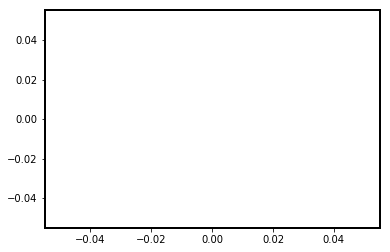

[]
[]


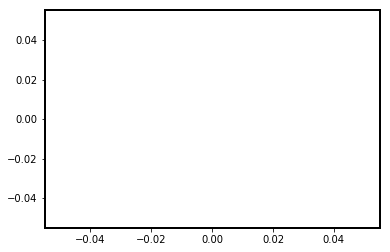

[]
[]


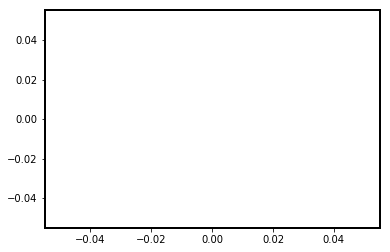

[]
[]


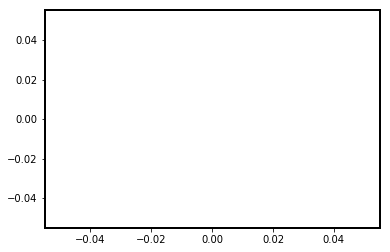

[]
[]


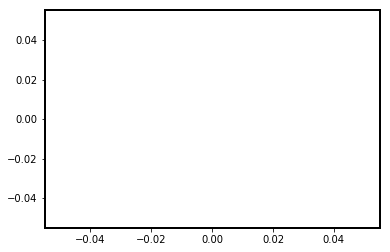

1998
[31.58666, 31.128881, 28.53481, 27.008883, 27.314068, 27.314068, 26.85629, 19.531847, 24.41481, 18.768885, 26.398512, 26.551105, 25.482958, 31.281475, 19.68444, 27.161476, 28.382215, 27.314068, 27.466661, 27.314068, 27.314068]
[17.0, 29.0, 24.0, 36.0, 20.0, 17.0, 17.0, 20.0, 10.0, 18.0, 20.0, 17.0, 5.0, 26, 21, 41, 19.0, 31.0, 35.0, 37.0, 37.0]


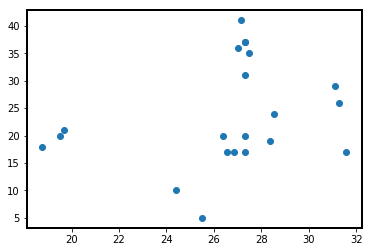

1999
[28.839994, 23.346663, 30.823696, 45.31999, 43.48888, 33.26518, 27.771845, 32.8074, 20.294811, 20.90518, 24.41481, 31.891846, 34.943695, 32.8074, 19.07407, 27.771845]
[16.0, 26.0, 42.0, 48.0, 38.0, 45.0, 36.0, 16.0, 30, 19.0, 29.0, 11.0, 11.0, 10.0, 26.0, 20.0]


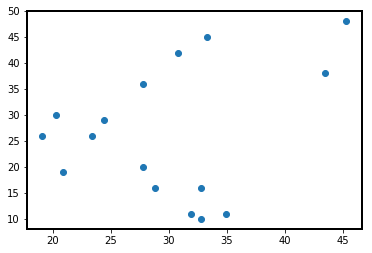

2000
[36.011845, 23.80444, 37.53777, 31.739252, 24.567402, 29.908142, 24.109625, 39.216286, 34.943695, 28.6874, 35.401474, 21.057774, 25.482958, 40.284435, 26.551105, 26.398512, 16.327404, 20.447403, 19.531847, 25.788143]
[35, 30, 34, 35, 34, 40, 54.0, 18.0, 69, 40, 46, 26.0, 48.0, 36.0, 15.0, 46, 13.0, 33.0, 22.0, 29.0]


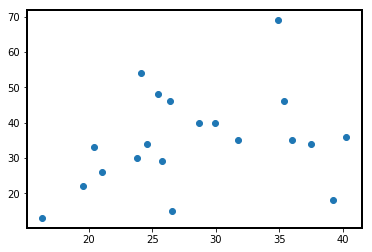

2001
[16.327404, 13.885922, 18.768885, 19.07407, 11.902219, 12.512589, 18.616293, 13.122959, 13.885922]
[20, 10.0, 7.0, 8.0, 16.0, 44, 10.0, 6.0, 8.0]


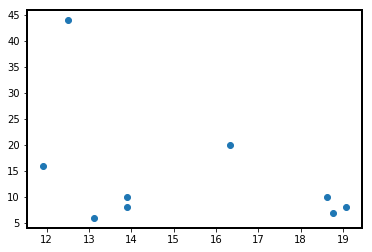

2002
[41.047398, 25.940735, 30.97629, 31.281475, 37.232586, 37.232586, 23.041477, 51.576283]
[33.0, 18.0, 17.0, 26.0, 23.0, 21.0, 45.0, 43.0]


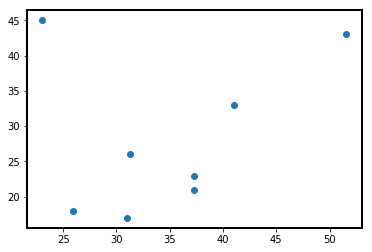

2003
[10.528886, 10.986664, 10.528886, 10.528886]
[15.0, 11.0, 5.0, 14.0]


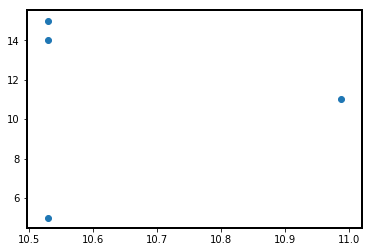

2004
[14.95407, 17.090366, 12.817775, 22.278513, 13.275552, 10.986664, 10.986664, 10.986664, 16.63259, 10.834071, 11.444442, 10.528886, 11.291849, 10.528886, 10.6814785, 13.885922, 10.834071, 10.6814785, 10.528886, 19.837032, 23.346663, 30.823696, 26.551105, 22.278513]
[43.0, 39.0, 17.0, 11.0, 8.0, 10.0, 7.0, 14.0, 15.0, 10.0, 12.0, 22.0, 18.0, 27.0, 10.0, 20.0, 12.0, 14.0, 13.0, 25, 20, 28.0, 33, 30]


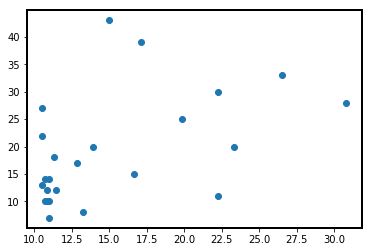

2005
[37.53777, 10.528886, 16.327404, 10.528886, 10.376293, 10.528886, 10.834071, 10.834071, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 14.648885, 10.834071, 12.817775, 13.580737, 11.444442, 12.970367, 10.528886, 13.428144, 14.038515, 40.284435, 42.42073, 41.505177, 37.842953, 25.177773, 25.788143, 18.616293, 14.95407, 15.869626]
[24.0, 13.0, 6.0, 22.0, 21.0, 11.0, 11.0, 7.0, 6.0, 9.0, 18.0, 6.0, 6.0, 18, 5.0, 16.0, 8.0, 14.0, 17.0, 15.0, 22.0, 23.0, 44.0, 35.0, 46.0, 38.0, 55.0, 12.0, 16.0, 15.0, 26.0]


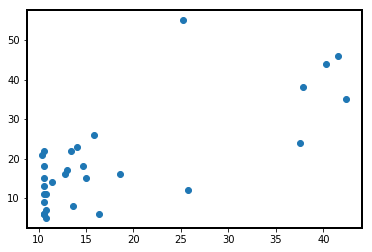

2006
[27.161476, 27.161476, 20.90518, 20.90518, 20.90518, 27.619253, 35.401474, 27.161476, 31.891846, 29.755548, 21.820736, 21.51555, 26.093328]
[13.0, 9.0, 34, 8.0, 8.0, 18.0, 25.0, 5.0, 7.0, 27.0, 13.0, 7.0, 7.0]


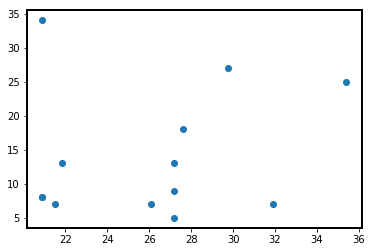

2007
[12.817775, 12.512589, 11.749626, 26.85629, 18.4637, 22.431107, 26.551105, 31.281475, 21.668144, 29.908142, 31.891846]
[5.0, 31, 8.0, 41, 27, 27, 5.0, 36.0, 42.0, 28, 17.0]


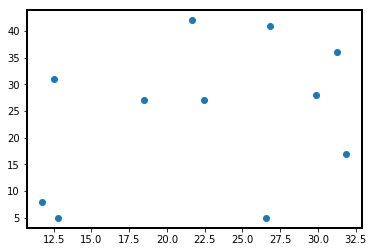

2008
[14.496293, 18.4637, 12.665182, 11.902219, 24.109625, 11.902219, 10.528886, 16.327404, 16.327404, 10.376293, 26.093328, 12.207404, 17.395552, 15.411848, 17.090366, 19.68444, 17.85333, 20.599997, 10.986664, 12.0548115, 26.093328, 26.093328]
[28, 35, 47.0, 63.0, 26.0, 18.0, 29.0, 38, 38, 46.0, 14.0, 36, 35, 6.0, 10.0, 7.0, 18.0, 31.0, 50.0, 48.0, 32.0, 30.0]


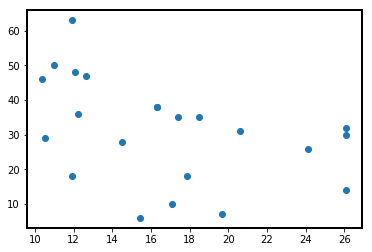

2009
[37.53777, 10.528886, 16.937775, 23.651846, 16.785181, 25.025179, 15.717033, 30.213327, 17.548145, 20.447403, 22.736292, 17.548145, 32.95999, 37.53777, 10.528886, 20.447403, 23.041477, 21.362959, 16.785181, 21.668144, 24.41481, 30.213327, 10.6814785, 23.957031, 16.327404, 20.447403, 17.548145]
[28.0, 46, 17.0, 20, 14.0, 22.0, 23.0, 29.0, 15.0, 12.0, 52.0, 9.0, 20.0, 23.0, 48, 26.0, 27.0, 24.0, 17.0, 6.0, 7.0, 24.0, 19.0, 24.0, 37.0, 9.0, 6.0]


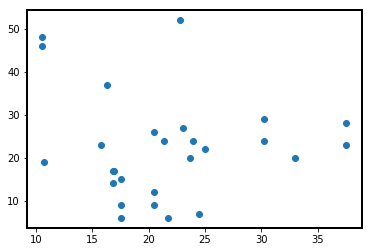

2010
[16.937775, 19.07407, 10.376293, 13.73333, 14.801477, 27.619253, 19.07407, 25.177773, 10.376293, 19.989626, 26.551105, 18.311108, 17.700737, 22.736292, 23.041477, 18.4637, 22.736292, 23.194069, 22.888884, 33.41777, 25.177773, 29.14518, 30.518513, 35.096287, 38.75851, 29.450363]
[27, 24.0, 29.0, 5.0, 17, 17.0, 20.0, 22, 31.0, 37.0, 30.0, 18.0, 26.0, 29.0, 26.0, 8.0, 35.0, 28, 41, 44, 36.0, 43, 50, 37, 13.0, 31.0]


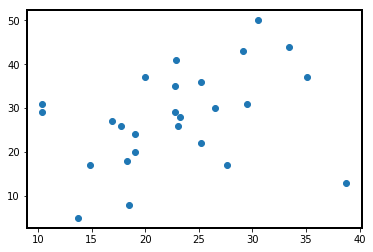

2011
[27.619253, 28.382215, 16.174812, 14.191108, 10.528886, 37.385178, 27.619253, 20.599997, 59.816284, 30.36592, 25.63555, 25.63555, 22.583698, 24.719995, 19.379255, 20.752588, 21.51555, 19.226664, 28.382215, 10.2237015, 18.768885, 14.191108, 10.528886, 10.528886, 10.528886]
[31, 30, 11.0, 12.0, 7.0, 13.0, 33, 17.0, 47.0, 19.0, 10.0, 12.0, 5.0, 6.0, 16.0, 16.0, 6.0, 17.0, 11.0, 42.0, 5.0, 8.0, 7.0, 25.0, 8.0]


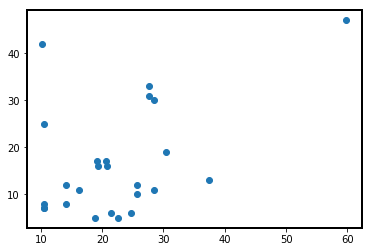

2012
[18.4637, 10.528886, 33.112587, 13.885922, 29.755548, 39.97925, 38.911102, 35.554066, 28.992586, 20.599997, 11.444442, 10.528886, 13.73333, 16.479998, 37.53777, 30.97629, 36.164436, 25.177773, 29.297771, 28.229624, 12.359997, 44.709618, 28.07703]
[12.0, 9.0, 5.0, 39.0, 20.0, 10.0, 81.0, 12.0, 10.0, 10.0, 7.0, 5.0, 6.0, 9.0, 11.0, 22.0, 5.0, 5.0, 16.0, 8.0, 12.0, 31.0, 27]


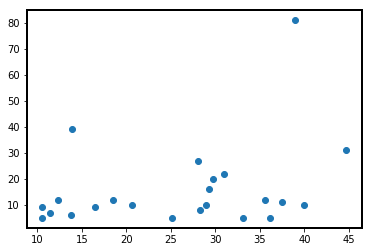

2013
[26.551105, 20.294811, 23.651846, 31.739252, 24.262217, 49.439987, 26.551105, 31.281475, 31.281475, 30.97629, 30.97629, 31.739252, 31.739252, 31.281475, 37.69036, 29.297771, 36.011845]
[22, 23, 26, 49, 27, 52.0, 27, 46, 44, 46, 35, 35, 37, 38.0, 17.0, 15.0, 33.0]


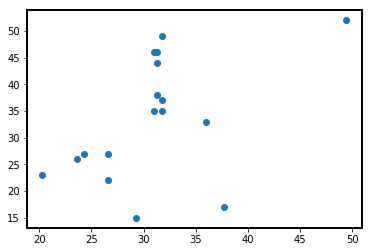

2014
[28.229624, 22.431107, 16.785181, 13.885922, 16.479998, 31.891846, 20.294811, 35.859253, 14.95407, 15.259255, 30.213327, 55.085915, 47.76147, 27.924438, 25.63555, 35.554066, 33.26518, 26.551105, 31.434067, 34.943695, 34.943695, 23.957031, 37.99555, 30.36592, 22.736292, 11.1392565, 12.359997, 12.970367, 10.6814785, 10.6814785, 16.785181, 15.717033]
[31.0, 64, 27.0, 60, 55, 29, 42, 32.0, 8.0, 30.0, 56.0, 8.0, 11.0, 46.0, 32.0, 9.0, 43, 27, 6.0, 8.0, 19.0, 9.0, 53, 29.0, 27, 21.0, 22.0, 11.0, 15.0, 76, 47.0, 41.0]


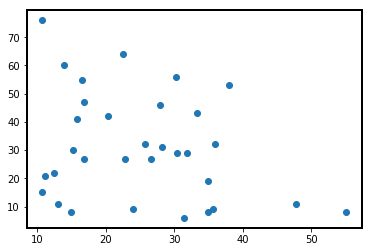

2015
[]
[]


/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


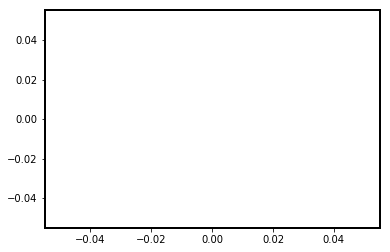

2016
[]
[]


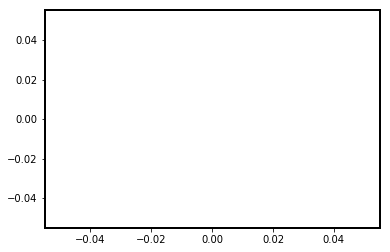

2017
[11.291849, 12.970367, 14.496293, 14.95407, 15.564441, 13.885922]
[18.0, 20.0, 23.0, 28.0, 43.0, 25]


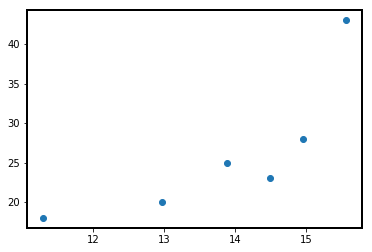

2018
[11.597034, 20.90518, 19.379255, 28.229624, 17.090366, 26.551105, 26.398512, 14.648885, 14.038515, 13.428144, 16.327404, 14.038515, 12.665182, 13.580737, 14.038515, 10.834071, 11.1392565, 12.359997, 17.548145, 19.989626, 13.122959, 12.970367, 10.986664, 13.885922, 11.597034]
[15.0, 18.0, 19.0, 22.0, 8.0, 5.0, 10.0, 31.0, 8.0, 18.0, 22.0, 15.0, 14.0, 8.0, 6.0, 6.0, 21.0, 21.0, 29.0, 37, 26.0, 25.0, 28.0, 35, 22]


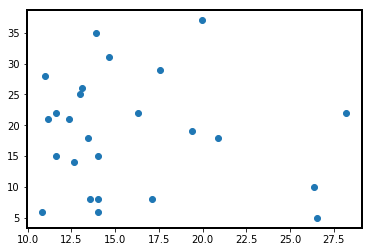

In [1043]:
yearwithdata = []; seasonalmean = []; finallatestdepth = [] ; pointstouse_small = []; pointstouse = []
years = []; correctedwospatdiffstd = []; ratio_of_water_column_std_corrected = []; seasonalstd = []; yearwithdata = []
seasonyeardepth = []; countwithinpolygon = []; correctedwospatdiffmean = [] ; latlat = []; ydyd = []
ratio_of_water_column = []; now = []; later = []; ratio_of_water_column_corrected = [] ; lonlon = []
seasonalmean = [] 
for year in range(1993,2019):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    counterii = []
    lat_intermediate = []; lon_intermediate = []; yd_intermediate = []
    p_intermediate = []; t_intermediate = []; sal_intermediate = []
    floor_intermediate = []; surfaceval_list = []
    seasonyeardepth2 = []; ratio_of_water_column2 = []
    
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        gear = npfile[i]['gear']
        floordepth = npfile[i]['depth']
#         if (yd > 334 and yd <= 365 and floordepth <= 200) or (yd >= 0 and yd <= 59 and floordepth <= 200) :
#         if yd > 59 and yd <= 151 and floordepth <= 200:
#         if (yd > 334 and yd <= 365) or (yd >= 0 and yd <= 59) :
        if yd > 304 and yd <= 334 and floordepth <= 200:  # and floordepth <= 200
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])
            sal_intermediate.append(npfile[i]['s'])
            floor_intermediate.append(npfile[i]['depth'])
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate,'depth': floor_intermediate, 's': sal_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate,'date': yd_intermediate})
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if isinstance(month_df['p'].iloc[ii], int) or isinstance(month_df['p'].iloc[ii], float) or isinstance(month_df['t'].iloc[ii], int) or isinstance(month_df['t'].iloc[ii], float):
            pass
        elif polygon_v.contains(point) == True:
            CT = gsw.CT_from_pt(month_df['s'].iloc[ii],month_df['t'].iloc[ii])
            DENS = gsw.sigma0(month_df['s'].iloc[ii],CT)
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'t': month_df['t'].iloc[ii], 's': month_df['s'].iloc[ii], 'CT': CT, 'DENSMLD': DENS}) 
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            countwithinpolygon.append(1)
            l=[i for i in df_final[0] if i<=4] 
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for iii in range(len(l)):
                    val = df_final[4][iii]
                    numrange.append(iii)
                    surfaceval.append(val)            
            surfacevalmean = statistics.mean(surfaceval)
            densfin = []; tempfin = []; pressurefin = []; salfin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
                salfin.append(df_final[2][iii])
                densfin.append(df_final[4][iii])
            d = {'temp': list(reversed(tempfin)), 'sal': list(reversed(salfin)), 'pressure': list(reversed(pressurefin)),'density': list(reversed(densfin))}
            dunreversed = {'temp': list(tempfin), 'sal': list(salfin), 'pressure': list(pressurefin), 'density': list(densfin)}
            dffinunreversed = pd.DataFrame(dunreversed)
            dffin = pd.DataFrame(d)
            
            for ix in range(len(dffinunreversed)):
                if dffinunreversed.at[ix,'density'] >= (surfacevalmean - 0.03) and dffinunreversed.at[ix,'density'] <= (surfacevalmean + 0.03):
                    if dffinunreversed.at[len(dffinunreversed)-1,'density'] <= (surfacevalmean + 0.03) and dffinunreversed.at[len(dffinunreversed)-1,'density'] >= (surfacevalmean - 0.03):
                        looknow = list(dffinunreversed['density'].values)
                        looknow2 = [i for i in looknow if i >= (surfacevalmean + 0.03)]
                        looknow3 = [i for i in looknow if i <= (surfacevalmean - 0.03)]
                        if len(looknow2) == 0 and len(looknow3) == 0:
                            if dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                                if dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                                    seasonyeardepth.append(month_df['depth'].iloc[ii])
                                    seasonyeardepth2.append(month_df['depth'].iloc[ii])
                                    ratio_of_water_column.append(1.0)
                                    ratio_of_water_column2.append(1.0)
                                    latlat.append(month_df['lat'].iloc[ii])
                                    lonlon.append(month_df['lon'].iloc[ii])
                                    ydyd.append(month_df['day'].iloc[ii])
                                    years.append(year)
                                    counterii.append(ii)
                                    break
                                else:
                                    seasonyeardepth.append(month_df['depth'].iloc[ii])
                                    seasonyeardepth2.append(month_df['depth'].iloc[ii])
                                    ratio_of_water_column.append(1.0)
                                    ratio_of_water_column2.append(1.0)
                                    latlat.append(month_df['lat'].iloc[ii])
                                    lonlon.append(month_df['lon'].iloc[ii])
                                    ydyd.append(month_df['day'].iloc[ii])
                                    years.append(year)
                                    counterii.append(ii)
                                    break
                            else:
                                if dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                                    seasonyeardepth.append(month_df['depth'].iloc[ii])
                                    seasonyeardepth2.append(month_df['depth'].iloc[ii])
                                    ratio_val = 1.0
                                    ratio_of_water_column.append(ratio_val)
                                    ratio_of_water_column2.append(ratio_val)
                                    latlat.append(month_df['lat'].iloc[ii])
                                    lonlon.append(month_df['lon'].iloc[ii])
                                    ydyd.append(month_df['day'].iloc[ii])
                                    years.append(year)
                                    counterii.append(ii)
                                    break
                        else:
                            if dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                                for ix in range(len(dffinunreversed['density'])):
                                    if dffinunreversed.at[ix,'density'] >= (surfacevalmean - 0.03) and dffinunreversed.at[ix,'density'] <= (surfacevalmean + 0.03):
                                        pass
                                    else:
                                        if dffinunreversed.at[ix,'pressure'] >= 5:
                                            seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                            seasonyeardepth2.append(dffinunreversed.at[ix,'pressure'])
                                            ratio_val = 1.0
                                            ratio_of_water_column.append(ratio_val)
                                            ratio_of_water_column2.append(ratio_val)
                                            latlat.append(month_df['lat'].iloc[ii])
                                            lonlon.append(month_df['lon'].iloc[ii])
                                            ydyd.append(month_df['day'].iloc[ii])
                                            years.append(year)
                                            counterii.append(ii)
                                            break
                                        else:
                                            break
                                break 
                    else:
                        if dffinunreversed.at[ix,'density'] <= (surfacevalmean - 0.03) or dffinunreversed.at[ix,'density'] >= (surfacevalmean + 0.03):
                            if dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                                pass
                            else:
                                seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                seasonyeardepth2.append(dffinunreversed.at[ix,'pressure'])
                                ratio_val = (dffinunreversed.at[ix,'pressure'])/(month_df['depth'].iloc[ii])
                                ratio_of_water_column.append(ratio_val)
                                ratio_of_water_column2.append(ratio_val)
                                latlat.append(month_df['lat'].iloc[ii])
                                lonlon.append(month_df['lon'].iloc[ii])
                                ydyd.append(month_df['day'].iloc[ii])
                                years.append(year)
                                counterii.append(ii)
                                break           
                        else: 
                            if dffinunreversed.at[ix,'density'] >= (surfacevalmean + 0.03) or dffinunreversed.at[ix,'density'] <= (surfacevalmean - 0.03):
                                seasonyeardepth.append('pass4')
                                break
#                                 pass
                elif dffinunreversed.at[ix,'density'] <= (surfacevalmean - 0.03) or dffinunreversed.at[ix,'density'] >= (surfacevalmean + 0.03):
                    if dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                        pass
                    else:
                        for ix in range(len(dffinunreversed['density'])):
                            if dffinunreversed.at[ix,'density'] >= (surfacevalmean - 0.03) and dffinunreversed.at[ix,'density'] <= (surfacevalmean + 0.03):
                                pass
                            else:
                                if dffinunreversed.at[ix,'pressure'] >= 5.0:
                                    seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                    seasonyeardepth2.append(dffinunreversed.at[ix,'pressure'])
                                    ratio_val = (dffinunreversed.at[ix,'pressure'])/(month_df['depth'].iloc[ii])
                                    ratio_of_water_column.append(ratio_val)
                                    ratio_of_water_column2.append(ratio_val)
                                    latlat.append(month_df['lat'].iloc[ii])
                                    lonlon.append(month_df['lon'].iloc[ii])
                                    ydyd.append(month_df['day'].iloc[ii])
                                    years.append(year)
                                    counterii.append(ii)
                                    break
                                else:
                                    break
                        break
                else: 
                    seasonyeardepth.append('pass9')
                    break
                            
    correctedwospatdiffmean.append(np.mean(seasonyeardepth2))
    correctedwospatdiffstd.append(np.std(seasonyeardepth2))
    ratio_of_water_column_corrected.append(np.mean(ratio_of_water_column2))
    ratio_of_water_column_std_corrected.append(np.std(ratio_of_water_column2))
    
#     inlat = []; inlon = []; date = []
#     for timer in counterii:
#         inlat.append(newdf['lat'][timer])
#         inlon.append(newdf['lon'][timer])
#         date.append(newdf['date'][timer])                 
#     if len(seasonyeardepth2) > 0:    
#         if len(seasonyeardepth2) == 1:  
#             std = 0
#             seasonalstd.append(std)
#         else:
#             seasonalstd.append(seasonyeardepth2)
# #         seasonalmean.append(statistics.mean(seasonyeardepth2))
# #         full = pd.DataFrame({'mld': seasonyeardepth,'lat': lat, 'lon': lon, 'date': date, 'year_df': year}) 
# #         finallatestdepth.append(seasonyeardepth2)
# #         year_newfinal = full['year_df'].tolist()
# #         year_final.append(year_newfinal)

# ---- 
    inlat = []; inlon = []; date = []
    for timer in counterii:
        inlat.append(newdf['lat'][timer])
        inlon.append(newdf['lon'][timer])
        date.append(newdf['date'][timer])                 
    if len(seasonyeardepth) > 0:    
#         if len(seasonyeardepth) == 1:  
#             std = 0
#             seasonalstd.append(std)
#         else:
#             seasonalstd.append(statistics.stdev(seasonyeardepth))
        yearwithdata.append(year)
        seasonalmean.append(np.mean(seasonyeardepth))
#         seasonalstd.append(statistics.stdev(seasonyeardepth))
        full = pd.DataFrame({'mld': seasonyeardepth,'lat': latlat, 'lon': lonlon, 'date': ydyd}) 
        finallatestdepth.append(seasonyeardepth)
        print(year)
#         print(seasonyeardepth)
    pointstousenow = []
    for x in range(len(date)):
        use=DS.sel(time=slice('{}-11-01'.format(year),'{}-11-30'.format(year))) 
        locate_date = use.sel(time=use.time.dt.day==(date[x])-304)
        mld_locate_date = locate_date.mlotst.values[0]
#         mld_locate_date = locate_date.si10.values[0]

#         mld_locate_date = locate_date.mlotst.values
    
        lat = np.array(locate_date.mlotst['latitude'][:])
        long = np.array(locate_date.mlotst['longitude'][:])
    
        lonneg = [float(i)*-1 for i in inlon]
        distanceslat = []; distanceslon = []
        for i in range(133):
            distanceslat.append((inlat[x] - lat[i])**2)
            index_min_lat = min(range(len(distanceslat)), key=distanceslat.__getitem__)
        for ii in range(181):
            distanceslon.append((lonneg[x] - long[ii])**2)
            index_min_lon = min(range(len(distanceslon)), key=distanceslon.__getitem__)
        lat_index_use, lon_index_use = index_min_lat, index_min_lon
        pointstouse.append(mld_locate_date[lat_index_use, lon_index_use]) 
        pointstousenow.append(mld_locate_date[lat_index_use, lon_index_use]) 
    print(pointstousenow)
    print(seasonyeardepth2)
    pointstouse_small.append(np.mean(pointstousenow))
    plt.scatter(pointstousenow, seasonyeardepth2)
    plt.show()

In [977]:
print(len(pointstouse))

338


In [870]:
# month3v = pointstouse
# month3densv = seasonyeardepth

In [1647]:
print(len(res_list_v_dens))
print(len(res_list_x_dens))

949
949


In [1662]:
print(np.nanmean(res_list_x_glorys_au))
print(np.nanstd(res_list_x_glorys_au))
print(np.nanmean(res_list_x_dens_au))
print(np.nanstd(res_list_x_dens_au))

18.12178
9.021067
20.724763406940063
13.394197576917875


In [1660]:
print(len(res_list_x_glorys_f))

1268


In [1658]:
slope, intercept, r_value, p_value, std_err = stats.linregress(res_list_x_glorys_f,res_list_x_dens_f)
print(p_value)
print(r_value)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1268 and the array at index 1 has size 1773

## Western Gulf of Maine START

In [1000]:
month10t = pointstouse
month10denst = seasonyeardepth

In [1018]:
month11t = pointstouse
month11denst = seasonyeardepth

In [1020]:
month12t = pointstouse
month12denst = seasonyeardepth

In [1021]:
res_list_t_glorys_f = list(itertools.chain(month10t,month11t,month12t)) 
res_list_t_dens_f = list(itertools.chain(month10denst,month11denst,month12denst)) 

df = pd.DataFrame({'glorys': res_list_t_glorys_f,
                   'dens': res_list_t_dens_f})
rho = df.corr()
print(rho)

          glorys      dens
glorys  1.000000  0.540093
dens    0.540093  1.000000


In [971]:
month7t = pointstouse
month7denst = seasonyeardepth

In [973]:
month8t = pointstouse
month8denst = seasonyeardepth

In [997]:
month9t = pointstouse
month9denst = seasonyeardepth

In [998]:
res_list_t_glorys_su = list(itertools.chain(month7t,month8t,month9t)) 
res_list_t_dens_su = list(itertools.chain(month7denst,month8denst,month9denst)) 

df = pd.DataFrame({'glorys': res_list_t_glorys_su,
                   'dens': res_list_t_dens_su})
rho = df.corr()
print(rho)

          glorys      dens
glorys  1.000000  0.151508
dens    0.151508  1.000000


In [916]:
# month4t = pointstouse
# month4denst = seasonyeardepth

In [935]:
# month5t = pointstouse
# month5denst = seasonyeardepth

In [937]:
# month6t = pointstouse
# month6denst = seasonyeardepth

In [939]:
# res_list_t_glorys_sp = list(itertools.chain(month4t,month5t,month6t)) 
# res_list_t_dens_sp = list(itertools.chain(month4denst,month5denst,month6denst)) 

# df = pd.DataFrame({'glorys': res_list_t_glorys_sp,
#                    'dens': res_list_t_dens_sp})
# rho = df.corr()
# print(rho)

          glorys      dens
glorys  1.000000  0.545192
dens    0.545192  1.000000


In [897]:
month3t = pointstouse
month3denst = seasonyeardepth

In [901]:
month2t = pointstouse
month2denst = seasonyeardepth

In [910]:
month1t = pointstouse
month1denst = seasonyeardepth

In [912]:
res_list_t_glorys = list(itertools.chain(month1t,month2t,month3t)) 
res_list_t_dens = list(itertools.chain(month1denst,month2denst,month3denst)) 

In [914]:
scipy.stats.pearsonr(res_list_t_glorys, res_list_t_dens)[0]

0.5002200285923478

## Western Gulf of Maine END

## Eastern Gulf of Maine START

In [1002]:
month10y = pointstouse
month10densy = seasonyeardepth

In [1016]:
month11y = pointstouse
month11densy = seasonyeardepth

In [1023]:
month12y = pointstouse
month12densy = seasonyeardepth

In [1024]:
res_list_y_glorys_f = list(itertools.chain(month10y,month11y,month12y)) 
res_list_y_dens_f = list(itertools.chain(month10densy,month11densy,month12densy)) 

df = pd.DataFrame({'glorys': res_list_y_glorys_f,
                   'dens': res_list_y_dens_f})
rho = df.corr()
print(rho)

          glorys      dens
glorys  1.000000  0.484188
dens    0.484188  1.000000


In [968]:
month7y = pointstouse
month7densy = seasonyeardepth

In [975]:
month8y = pointstouse
month8densy = seasonyeardepth

In [994]:
month9y = pointstouse
month9densy = seasonyeardepth

In [995]:
res_list_y_glorys_su = list(itertools.chain(month7y,month8y,month9y)) 
res_list_y_dens_su = list(itertools.chain(month7densy,month8densy,month9densy)) 

df = pd.DataFrame({'glorys': res_list_y_glorys_su,
                   'dens': res_list_y_dens_su})
rho = df.corr()
print(rho)

          glorys      dens
glorys  1.000000  0.021007
dens    0.021007  1.000000


In [918]:
# month4y = pointstouse
# month4densy = seasonyeardepth

In [933]:
# month5y = pointstouse
# month5densy = seasonyeardepth

In [941]:
# month6y = pointstouse
# month6densy = seasonyeardepth

In [942]:
# res_list_y_glorys_sp = list(itertools.chain(month4y,month5y,month6y)) 
# res_list_y_dens_sp = list(itertools.chain(month4densy,month5densy,month6densy)) 

# df = pd.DataFrame({'glorys': res_list_y_glorys_sp,
#                    'dens': res_list_y_dens_sp})
# rho = df.corr()
# print(rho)

          glorys      dens
glorys  1.000000  0.382981
dens    0.382981  1.000000


In [894]:
month3y = pointstouse
month3densy = seasonyeardepth

In [903]:
month2y = pointstouse
month2densy = seasonyeardepth

In [905]:
month1y = pointstouse
month1densy = seasonyeardepth

In [907]:
res_list_y_glorys = list(itertools.chain(month1y,month2y,month3y)) 
res_list_y_dens = list(itertools.chain(month1densy,month2densy,month3densy)) 

In [908]:
scipy.stats.pearsonr(res_list_y_glorys, res_list_y_dens)[0]

0.33933009799459163

## Eastern Gulf of Maine END

## Georges Bank START

In [1004]:
month10w = pointstouse
month10densw = seasonyeardepth

In [1014]:
month11w = pointstouse
month11densw = seasonyeardepth

In [1026]:
month12w = pointstouse
month12densw = seasonyeardepth

In [1027]:
res_list_w_glorys_f = list(itertools.chain(month10w,month11w,month12w)) 
res_list_w_dens_f = list(itertools.chain(month10densw,month11densw,month12densw)) 

df = pd.DataFrame({'glorys': res_list_w_glorys_f,
                   'dens': res_list_w_dens_f})
rho = df.corr()
print(rho)

          glorys      dens
glorys  1.000000  0.370453
dens    0.370453  1.000000


In [966]:
month7w = pointstouse
month7densw = seasonyeardepth

In [978]:
month8w = pointstouse
month8densw = seasonyeardepth

In [991]:
month9w = pointstouse
month9densw = seasonyeardepth

In [992]:
res_list_w_glorys_su = list(itertools.chain(month7w,month8w,month9w)) 
res_list_w_dens_su = list(itertools.chain(month7densw,month8densw,month9densw)) 

df = pd.DataFrame({'glorys': res_list_w_glorys_su,
                   'dens': res_list_w_dens_su})
rho = df.corr()
print(rho)

          glorys      dens
glorys  1.000000  0.005742
dens    0.005742  1.000000


In [920]:
# month4w = pointstouse
# month4densw = seasonyeardepth

In [931]:
# month5w = pointstouse
# month5densw = seasonyeardepth

In [944]:
# month6w = pointstouse
# month6densw = seasonyeardepth

In [945]:
# res_list_w_glorys_sp = list(itertools.chain(month4w,month5w,month6w)) 
# res_list_w_dens_sp = list(itertools.chain(month4densw,month5densw,month6densw)) 

# df = pd.DataFrame({'glorys': res_list_w_glorys_sp,
#                    'dens': res_list_w_dens_sp})
# rho = df.corr()
# print(rho)

          glorys      dens
glorys  1.000000  0.375554
dens    0.375554  1.000000


In [881]:
# month1w = pointstouse
# month1densw = seasonyeardepth

In [884]:
# month2w = pointstouse
# month2densw = seasonyeardepth

In [887]:
# month3w = pointstouse
# month3densw = seasonyeardepth

In [889]:
# res_list_w_glorys = list(itertools.chain(month1w,month2w,month3w)) 
# res_list_w_dens = list(itertools.chain(month1densw,month2densw,month3densw)) 

## Georges Bank END

## NMAB START

In [1006]:
month10x = pointstouse
month10densx = seasonyeardepth

In [1012]:
month11x = pointstouse
month11densx = seasonyeardepth

In [1030]:
month12x = pointstouse
month12densx = seasonyeardepth

In [1039]:
print(len(month12densx))

330


In [1041]:
print(len(res_list_x_dens_au))

1773


In [1042]:
res_list_x_glorys_au = list(itertools.chain(month10x,month11x,month12x)) 
res_list_x_dens_au = list(itertools.chain(month10densx,month11densx,month12densx)) 

df = pd.DataFrame({'glorys': res_list_x_glorys_au,
                   'dens': res_list_x_dens_au})
rho = df.corr()
print(rho)

          glorys      dens
glorys  1.000000  0.571465
dens    0.571465  1.000000


In [964]:
month7x = pointstouse
month7densx = seasonyeardepth

In [980]:
month8x = pointstouse
month8densx = seasonyeardepth

In [988]:
month9x = pointstouse
month9densx = seasonyeardepth

In [989]:
res_list_x_glorys_su = list(itertools.chain(month7x,month8x,month9x)) 
res_list_x_dens_su = list(itertools.chain(month7densx,month8densx,month9densx)) 

df = pd.DataFrame({'glorys': res_list_x_glorys_su,
                   'dens': res_list_x_dens_su})
rho = df.corr()
print(rho)

          glorys      dens
glorys  1.000000  0.181261
dens    0.181261  1.000000


# month4x = pointstouse
# month4densx = seasonyeardepth

In [929]:
# month5x = pointstouse
# month5densx = seasonyeardepth

In [947]:
# month6x = pointstouse
# month6densx = seasonyeardepth

In [948]:
# res_list_x_glorys_sp = list(itertools.chain(month4x,month5x,month6x)) 
# res_list_x_dens_sp = list(itertools.chain(month4densx,month5densx,month6densx)) 

# df = pd.DataFrame({'glorys': res_list_x_glorys_sp,
#                    'dens': res_list_x_dens_sp})
# rho = df.corr()
# print(rho)

          glorys      dens
glorys  1.000000  0.509361
dens    0.509361  1.000000


## NMAB END

## SMAB START

In [1008]:
month10v = pointstouse
month10densv = seasonyeardepth

In [1010]:
month11v = pointstouse
month11densv = seasonyeardepth

In [1044]:
month12v = pointstouse
month12densv = seasonyeardepth

In [1661]:
res_list_v_glorys_f = list(itertools.chain(month10v,month11v,month12v)) 
res_list_v_dens_f = list(itertools.chain(month10densv,month11densv,month12densv)) 

df = pd.DataFrame({'glorys': res_list_v_glorys_f,
                   'dens': res_list_v_dens_f})
rho = df.corr()
print(rho)

          glorys      dens
glorys  1.000000  0.547993
dens    0.547993  1.000000


In [962]:
month7v = pointstouse
month7densv = seasonyeardepth

In [983]:
month8v = pointstouse
month8densv = seasonyeardepth

In [985]:
month9v = pointstouse
month9densv = seasonyeardepth

In [986]:
res_list_v_glorys_su = list(itertools.chain(month7v,month8v,month9v)) 
res_list_v_dens_su = list(itertools.chain(month7densv,month8densv,month9densv)) 

df = pd.DataFrame({'glorys': res_list_v_glorys_su,
                   'dens': res_list_v_dens_su})
rho = df.corr()
print(rho)

          glorys      dens
glorys  1.000000 -0.047726
dens   -0.047726  1.000000


In [925]:
# month4v = pointstouse
# month4densv = seasonyeardepth

In [927]:
# month5v = pointstouse
# month5densv = seasonyeardepth

In [957]:
# month6v = pointstouse
# month6densv = seasonyeardepth

In [959]:
res_list_v_glorys_sp = list(itertools.chain(month4v,month5v,month6v)) 
res_list_v_dens_sp = list(itertools.chain(month4densv,month5densv,month6densv)) 

df = pd.DataFrame({'glorys': res_list_v_glorys_sp,
                   'dens': res_list_v_dens_sp})
rho = df.corr()
print(rho)

          glorys      dens
glorys  1.000000  0.482533
dens    0.482533  1.000000


## SMAB END

In [873]:
# month2v = pointstouse
# month2densv = seasonyeardepth

In [876]:
# res_list_v_glorys = list(itertools.chain(month2v,month3v)) 
# res_list_v_dens = list(itertools.chain(month2densv,month3densv)) 

In [849]:
# month1 = pointstouse
# month1dens = seasonyeardepth

In [855]:
# month2 = pointstouse
# month2dens = seasonyeardepth

In [857]:
# month3 = pointstouse
# month3dens = seasonyeardepth

In [1648]:
res_list_x_glorys = list(itertools.chain(month1, month2,month3)) 
res_list_x_dens = list(itertools.chain(month1dens, month2dens,month3dens)) 

In [1649]:
print(len(res_list_x_glorys))

740


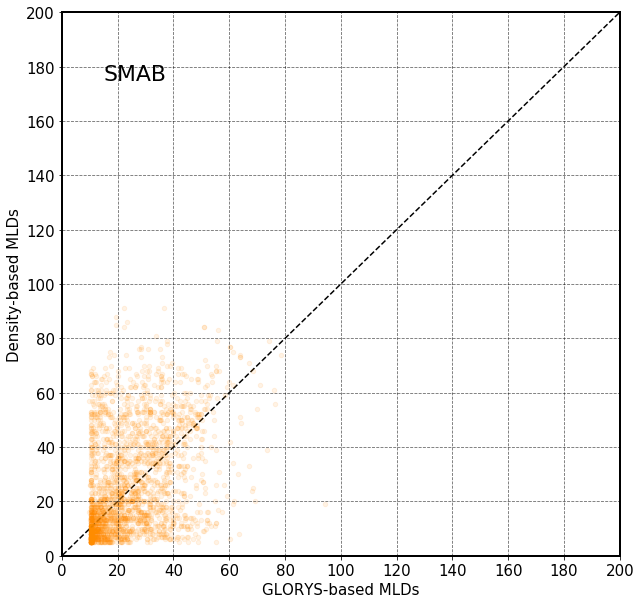

In [1063]:
plt.figure(figsize=(10,10))
plt.xlim((0,200))
plt.ylim((0,200))

xlist = [-50,300]
ylist = [-50,300]

# new_ylist_add = [x+7.296282117188131 for x in ylist]
# new_ylist_upper= [x+22.126405703353008 for x in new_ylist_add]
# new_ylist_lower = [x-22.126405703353008 for x in new_ylist_add]

# plt.scatter(res_list_w_glorys, res_list_w_dens, color='blue', s = 20, alpha = 0.1)
# plt.scatter(res_list_w_glorys_su, res_list_w_dens_su, color='green', s = 20, alpha = 0.1)
# plt.scatter(res_list_w_glorys_sp, res_list_w_dens_sp, color='red', s = 20, alpha = 0.1)
plt.scatter(res_list_w_glorys_f, res_list_w_dens_f, color='darkorange', s = 20, alpha = 0.1)

plt.plot(xlist,ylist, linestyle='--', color='black', linewidth=1.5, zorder= 0)
# plt.plot(xlist,new_ylist_add, linestyle='-', color='darkblue', linewidth=1.5, zorder= 0)
# plt.plot(xlist,new_ylist_upper, linestyle='-', color='cornflowerblue', linewidth=1.5, zorder= 0)
# plt.plot(xlist,new_ylist_lower, linestyle='-', color='cornflowerblue', linewidth=1.5, zorder= 0)

plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.6)
plt.xlabel('GLORYS-based MLDs', fontsize = 15)
plt.ylabel('Density-based MLDs', fontsize = 15)
plt.xticks([0,20,40,60,80,100,120,140,160,180,200], fontsize = 15) 
plt.yticks([0,20,40,60,80,100,120,140,160,180,200], fontsize = 15) 
mpl.rcParams['axes.linewidth'] = 2
plt.text(15, 175, 'SMAB', dict(size=22))

plt.show()


In [891]:
print(len(res_list_x_glorys))

949


In [693]:
x = pointstouse
y = seasonyeardepth
xydiff = [a_i - b_i for a_i, b_i in zip(y, x)]
listpos=[]; listneg=[]
[listpos.append(i) for i in xydiff if i >0]
[listneg.append(i) for i in xydiff if i <0]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [694]:
print(len(listpos))
print(len(listneg))

77
172


In [892]:
import scipy.stats
from scipy import stats

scipy.stats.pearsonr(res_list_w_glorys, res_list_w_dens)[0]

0.4435570840680949

In [696]:
print(np.nanmean(xydiff))
print(np.nanstd(xydiff))
print(scipy.stats.pearsonr(pointstouse, seasonyeardepth)[0])

-0.73355038577773
6.477353744863417
0.29868796460800295


In [655]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(seasonyeardepth,pointstouse))
print(rmse)

22.291834818021957


In [488]:
slope,intercept, r_value, p_value, std_err = stats.linregress(pointstouse, seasonyeardepth)

/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:107: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:119: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


In [489]:
print(r_value)

0.0


In [491]:
print(pointstouse)
print(seasonyeardepth)

[10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886, 10.528886]
[7.0, 10.0, 6.0, 8.0, 6.0, 10.0, 8.0, 5.0, 5.0, 6.0, 5.0, 6.0, 5.0, 14.0, 11.0, 7.0, 10.0, 5.0, 11.0, 6.0, 9.0, 5.0, 7.0, 7.0, 7.0, 6.0, 7.0, 10.0, 14.0, 10.0, 9.0, 20.0, 18.0, 10.0, 12.0, 6.0, 5.0, 5.0, 6.0, 8.0, 7.0, 5.0, 11.0, 11.0, 5.0, 9.0, 8.0, 5.0]


In [671]:
df = pd.DataFrame({'glorys': pointstouse,
                   'dens': seasonyeardepth})
rho = df.corr()
print(rho)

          glorys      dens
glorys  1.000000  0.463862
dens    0.463862  1.000000


In [316]:
np.nancorrelate(pointstouse, seasonyeardepth)


AttributeError: module 'numpy' has no attribute 'nancorrelate'

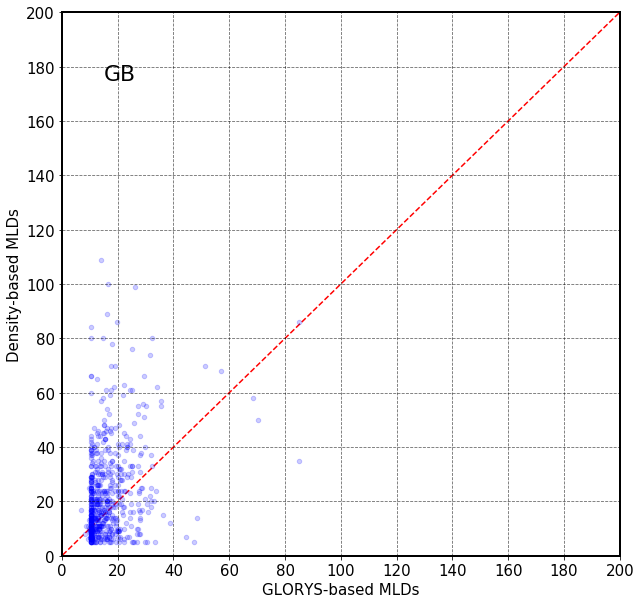

In [348]:
plt.figure(figsize=(10,10))
plt.xlim((0,200))
plt.ylim((0,200))

xlist = [-50,300]
ylist = [-50,300]

# new_ylist_add = [x+7.296282117188131 for x in ylist]
# new_ylist_upper= [x+22.126405703353008 for x in new_ylist_add]
# new_ylist_lower = [x-22.126405703353008 for x in new_ylist_add]

plt.scatter(pointstouse, seasonyeardepth, color='blue', s = 20, alpha = 0.2)
plt.plot(xlist,ylist, linestyle='--', color='red', linewidth=1.5, zorder= 0)
# plt.plot(xlist,new_ylist_add, linestyle='-', color='darkblue', linewidth=1.5, zorder= 0)
# plt.plot(xlist,new_ylist_upper, linestyle='-', color='cornflowerblue', linewidth=1.5, zorder= 0)
# plt.plot(xlist,new_ylist_lower, linestyle='-', color='cornflowerblue', linewidth=1.5, zorder= 0)

plt.grid(b=True, which='both', color='black', linestyle='--',alpha = 0.6)
plt.xlabel('GLORYS-based MLDs', fontsize = 15)
plt.ylabel('Density-based MLDs', fontsize = 15)
plt.xticks([0,20,40,60,80,100,120,140,160,180,200], fontsize = 15) 
plt.yticks([0,20,40,60,80,100,120,140,160,180,200], fontsize = 15) 
mpl.rcParams['axes.linewidth'] = 2
plt.text(15, 175, 'GB', dict(size=22))

plt.show()

In [ ]:
wabs_c_diff 
wabs_c_diff_std

In [1097]:
arr = np.array(wabs_c_diff)
print(np.min(wabs_c_diff), np.argmin(wabs_c_diff))
print(np.max(wabs_c_diff),np.argmax(wabs_c_diff))
print(np.mean(wabs_c_diff))
print(wabs_c_diff)
print(np.mean(wabs_c_diff[5:8]))

-1.0695815685509302 10
17.788843377981685 2
6.85260420675863
[ 3.18588966  5.02890923 17.78884338 16.89393726 14.16502697 14.02436263
  0.59565607  4.59691213  3.70306314  4.04374015 -1.06958157 -0.72550857]
6.405643610980974


In [1098]:
new = tabs_c_diff
arr = np.array(new)
print(np.min(new), np.argmin(new))
print(np.max(new),np.argmax(new))
print(np.mean(new))
print(new)
print(np.mean(new[5:8]))

-4.069542207279746 11
16.439036409702823 1
3.6421830527253274
[10.82365693 16.43903641 12.6408792   9.09424869  2.13534445 -0.79792363
 -2.99880463 -2.72207297  1.73089786  0.85735058  0.57312595 -4.06954221]
-2.172933743037596


In [1096]:
new = yabs_c_diff
arr = np.array(new)
print(np.min(new), np.argmin(new))
print(np.max(new),np.argmax(new))
print(np.mean(new))
print(np.mean(new[5:8]))

-12.603839874267578 11
8.72894933268449 2
-0.18127361446494783
-1.892047056984568


In [1099]:
new = xabs_c_diff
arr = np.array(new)
print(np.min(new), np.argmin(new))
print(np.max(new),np.argmax(new))
print(np.mean(new))
print(np.mean(new[5:8]))

-3.714537169208457 6
13.837992759137329 0
4.467416532356471
-2.2074937444313067


In [1100]:
new = vabs_c_diff
arr = np.array(new)
print(np.min(new), np.argmin(new))
print(np.max(new),np.argmax(new))
print(np.mean(new))
print(np.mean(new[5:8]))

-3.137054682450434 6
12.177567847031813 3
1.7051941141583422
-3.019689877899458


In [1101]:
summed = -3.019689877899458 -2.2074937444313067 -1.892047056984568 -2.172933743037596

In [1102]:
summed/4

-2.3230411055882323

In [1110]:
from scipy.interpolate import griddata

In [1146]:
zi_listofarrays = [];finaldepth = []; finallat = [];finallon = []
yearwithdata = []; seasonalmean = []; finallatestdepth = [] ; pointstouse_small = []; pointstouse = []
years = []; correctedwospatdiffstd = []; ratio_of_water_column_std_corrected = []; seasonalstd = []; yearwithdata = []
seasonyeardepth = []; countwithinpolygon = []; correctedwospatdiffmean = [] ; latlat = []; ydyd = []
ratio_of_water_column = []; now = []; later = []; ratio_of_water_column_corrected = [] ; lonlon = []
seasonalmean = [] 
for year in range(1993,2019):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    counterii = []
    lat_intermediate = []; lon_intermediate = []; yd_intermediate = []
    p_intermediate = []; t_intermediate = []; sal_intermediate = []
    floor_intermediate = []; surfaceval_list = []
    seasonyeardepth2 = []; ratio_of_water_column2 = []
    
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        gear = npfile[i]['gear']
        floordepth = npfile[i]['depth']
#         if (yd > 334 and yd <= 365 and floordepth <= 200) or (yd >= 0 and yd <= 59 and floordepth <= 200) :
#         if yd > 59 and yd <= 151 and floordepth <= 200:
#         if (yd > 334 and yd <= 365) or (yd >= 0 and yd <= 59) :
        if yd > 304 and yd <= 334 and floordepth <= 200:  # and floordepth <= 200
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])
            sal_intermediate.append(npfile[i]['s'])
            floor_intermediate.append(npfile[i]['depth'])
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate,'depth': floor_intermediate, 's': sal_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate,'date': yd_intermediate})
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if isinstance(month_df['p'].iloc[ii], int) or isinstance(month_df['p'].iloc[ii], float) or isinstance(month_df['t'].iloc[ii], int) or isinstance(month_df['t'].iloc[ii], float):
            pass
        elif polygon_v.contains(point) == True:
            CT = gsw.CT_from_pt(month_df['s'].iloc[ii],month_df['t'].iloc[ii])
            DENS = gsw.sigma0(month_df['s'].iloc[ii],CT)
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'t': month_df['t'].iloc[ii], 's': month_df['s'].iloc[ii], 'CT': CT, 'DENSMLD': DENS}) 
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            countwithinpolygon.append(1)
            l=[i for i in df_final[0] if i<=4] 
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for iii in range(len(l)):
                    val = df_final[4][iii]
                    numrange.append(iii)
                    surfaceval.append(val)            
            surfacevalmean = statistics.mean(surfaceval)
            densfin = []; tempfin = []; pressurefin = []; salfin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
                salfin.append(df_final[2][iii])
                densfin.append(df_final[4][iii])
            d = {'temp': list(reversed(tempfin)), 'sal': list(reversed(salfin)), 'pressure': list(reversed(pressurefin)),'density': list(reversed(densfin))}
            dunreversed = {'temp': list(tempfin), 'sal': list(salfin), 'pressure': list(pressurefin), 'density': list(densfin)}
            dffinunreversed = pd.DataFrame(dunreversed)
            dffin = pd.DataFrame(d)
            
            for ix in range(len(dffinunreversed)):
                if dffinunreversed.at[ix,'density'] >= (surfacevalmean - 0.03) and dffinunreversed.at[ix,'density'] <= (surfacevalmean + 0.03):
                    if dffinunreversed.at[len(dffinunreversed)-1,'density'] <= (surfacevalmean + 0.03) and dffinunreversed.at[len(dffinunreversed)-1,'density'] >= (surfacevalmean - 0.03):
                        looknow = list(dffinunreversed['density'].values)
                        looknow2 = [i for i in looknow if i >= (surfacevalmean + 0.03)]
                        looknow3 = [i for i in looknow if i <= (surfacevalmean - 0.03)]
                        if len(looknow2) == 0 and len(looknow3) == 0:
                            if dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                                if dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                                    seasonyeardepth.append(month_df['depth'].iloc[ii])
                                    seasonyeardepth2.append(month_df['depth'].iloc[ii])
                                    ratio_of_water_column.append(1.0)
                                    ratio_of_water_column2.append(1.0)
                                    latlat.append(month_df['lat'].iloc[ii])
                                    lonlon.append(month_df['lon'].iloc[ii])
                                    ydyd.append(month_df['day'].iloc[ii])
                                    years.append(year)
                                    counterii.append(ii)
                                    break
                                else:
                                    seasonyeardepth.append(month_df['depth'].iloc[ii])
                                    seasonyeardepth2.append(month_df['depth'].iloc[ii])
                                    ratio_of_water_column.append(1.0)
                                    ratio_of_water_column2.append(1.0)
                                    latlat.append(month_df['lat'].iloc[ii])
                                    lonlon.append(month_df['lon'].iloc[ii])
                                    ydyd.append(month_df['day'].iloc[ii])
                                    years.append(year)
                                    counterii.append(ii)
                                    break
                            else:
                                if dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                                    seasonyeardepth.append(month_df['depth'].iloc[ii])
                                    seasonyeardepth2.append(month_df['depth'].iloc[ii])
                                    ratio_val = 1.0
                                    ratio_of_water_column.append(ratio_val)
                                    ratio_of_water_column2.append(ratio_val)
                                    latlat.append(month_df['lat'].iloc[ii])
                                    lonlon.append(month_df['lon'].iloc[ii])
                                    ydyd.append(month_df['day'].iloc[ii])
                                    years.append(year)
                                    counterii.append(ii)
                                    break
                        else:
                            if dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                                for ix in range(len(dffinunreversed['density'])):
                                    if dffinunreversed.at[ix,'density'] >= (surfacevalmean - 0.03) and dffinunreversed.at[ix,'density'] <= (surfacevalmean + 0.03):
                                        pass
                                    else:
                                        if dffinunreversed.at[ix,'pressure'] >= 5:
                                            seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                            seasonyeardepth2.append(dffinunreversed.at[ix,'pressure'])
                                            ratio_val = 1.0
                                            ratio_of_water_column.append(ratio_val)
                                            ratio_of_water_column2.append(ratio_val)
                                            latlat.append(month_df['lat'].iloc[ii])
                                            lonlon.append(month_df['lon'].iloc[ii])
                                            ydyd.append(month_df['day'].iloc[ii])
                                            years.append(year)
                                            counterii.append(ii)
                                            break
                                        else:
                                            break
                                break 
                    else:
                        if dffinunreversed.at[ix,'density'] <= (surfacevalmean - 0.03) or dffinunreversed.at[ix,'density'] >= (surfacevalmean + 0.03):
                            if dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                                pass
                            else:
                                seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                seasonyeardepth2.append(dffinunreversed.at[ix,'pressure'])
                                ratio_val = (dffinunreversed.at[ix,'pressure'])/(month_df['depth'].iloc[ii])
                                ratio_of_water_column.append(ratio_val)
                                ratio_of_water_column2.append(ratio_val)
                                latlat.append(month_df['lat'].iloc[ii])
                                lonlon.append(month_df['lon'].iloc[ii])
                                ydyd.append(month_df['day'].iloc[ii])
                                years.append(year)
                                counterii.append(ii)
                                break           
                        else: 
                            if dffinunreversed.at[ix,'density'] >= (surfacevalmean + 0.03) or dffinunreversed.at[ix,'density'] <= (surfacevalmean - 0.03):
                                seasonyeardepth.append('pass4')
                                break
#                                 pass
                elif dffinunreversed.at[ix,'density'] <= (surfacevalmean - 0.03) or dffinunreversed.at[ix,'density'] >= (surfacevalmean + 0.03):
                    if dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                        pass
                    else:
                        for ix in range(len(dffinunreversed['density'])):
                            if dffinunreversed.at[ix,'density'] >= (surfacevalmean - 0.03) and dffinunreversed.at[ix,'density'] <= (surfacevalmean + 0.03):
                                pass
                            else:
                                if dffinunreversed.at[ix,'pressure'] >= 5.0:
                                    seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                    seasonyeardepth2.append(dffinunreversed.at[ix,'pressure'])
                                    ratio_val = (dffinunreversed.at[ix,'pressure'])/(month_df['depth'].iloc[ii])
                                    ratio_of_water_column.append(ratio_val)
                                    ratio_of_water_column2.append(ratio_val)
                                    latlat.append(month_df['lat'].iloc[ii])
                                    lonlon.append(month_df['lon'].iloc[ii])
                                    ydyd.append(month_df['day'].iloc[ii])
                                    years.append(year)
                                    counterii.append(ii)
                                    break
                                else:
                                    break
                        break
                else: 
                    seasonyeardepth.append('pass9')
                    break
                            
    correctedwospatdiffmean.append(np.mean(seasonyeardepth2))
    correctedwospatdiffstd.append(np.std(seasonyeardepth2))
    ratio_of_water_column_corrected.append(np.mean(ratio_of_water_column2))
    ratio_of_water_column_std_corrected.append(np.std(ratio_of_water_column2))
    
#     inlat = []; inlon = []; date = []
#     for timer in counterii:
#         inlat.append(newdf['lat'][timer])
#         inlon.append(newdf['lon'][timer])
#         date.append(newdf['date'][timer])                 
#     if len(seasonyeardepth2) > 0:    
#         if len(seasonyeardepth2) == 1:  
#             std = 0
#             seasonalstd.append(std)
#         else:
#             seasonalstd.append(seasonyeardepth2)
# #         seasonalmean.append(statistics.mean(seasonyeardepth2))
# #         full = pd.DataFrame({'mld': seasonyeardepth,'lat': lat, 'lon': lon, 'date': date, 'year_df': year}) 
# #         finallatestdepth.append(seasonyeardepth2)
# #         year_newfinal = full['year_df'].tolist()
# #         year_final.append(year_newfinal)

# ---- 
    inlat = []; inlon = []; date = []
    for timer in counterii:
        inlat.append(newdf['lat'][timer])
        inlon.append(newdf['lon'][timer])
        date.append(newdf['date'][timer])                 
    if len(seasonyeardepth) > 0:    
#         if len(seasonyeardepth) == 1:  
#             std = 0
#             seasonalstd.append(std)
#         else:
#             seasonalstd.append(statistics.stdev(seasonyeardepth))
        yearwithdata.append(year)
        seasonalmean.append(np.mean(seasonyeardepth))
#         seasonalstd.append(statistics.stdev(seasonyeardepth))
        full = pd.DataFrame({'mld': seasonyeardepth,'lat': latlat, 'lon': lonlon, 'date': ydyd}) 
        finallatestdepth.append(seasonyeardepth)
        print(year)
#         print(seasonyeardepth)
    pointstousenow = []
    for x in range(len(date)):
        use=DS.sel(time=slice('{}-11-01'.format(year),'{}-11-30'.format(year))) 
        locate_date = use.sel(time=use.time.dt.day==(date[x])-304)
        mld_locate_date = locate_date.mlotst.values[0]
#         mld_locate_date = locate_date.si10.values[0]

#         mld_locate_date = locate_date.mlotst.values
    
        lat = np.array(locate_date.mlotst['latitude'][:])
        long = np.array(locate_date.mlotst['longitude'][:])
    
        lonneg = [float(i)*-1 for i in inlon]
        distanceslat = []; distanceslon = []
        for i in range(133):
            distanceslat.append((inlat[x] - lat[i])**2)
            index_min_lat = min(range(len(distanceslat)), key=distanceslat.__getitem__)
        for ii in range(181):
            distanceslon.append((lonneg[x] - long[ii])**2)
            index_min_lon = min(range(len(distanceslon)), key=distanceslon.__getitem__)
        lat_index_use, lon_index_use = index_min_lat, index_min_lon
        pointstouse.append(mld_locate_date[lat_index_use, lon_index_use]) 
        pointstousenow.append(mld_locate_date[lat_index_use, lon_index_use]) 
    print(pointstousenow)
    print(seasonyeardepth2)
    pointstouse_small.append(np.mean(pointstousenow))

#     inlat = []; inlon = []
#     for timer in counterii:
#         inlat.append(newdf['lat'][timer])
#         inlon.append(newdf['lon'][timer])
#     if len(finaldepth) > 0:
    finaldepth.append(seasonyeardepth) # change back to seasonyeardepth
    print('***',finaldepth)
    finallat.append(inlat)
    finallon.append(inlon)
    
    flat_depth = [item for sublist in finaldepth for item in sublist]
    flat_lat = [item for sublist in finallat for item in sublist]
    flat_lon = [item for sublist in finallon for item in sublist]
    
#     flat_lon[:] = [x *-1 for x in flat_lon]
    
#     name = 'dfplottablefull_{}'.format(year)
    
#     name = pd.DataFrame(list(zip(flat_depth,flat_lon,flat_lat)),columns = ['depth','lon','lat'])

#     x = 'x_{}'.format(year)
#     x = name['lon']
#     y = 'y_{}'.format(year)
#     y = name['lat']
#     z = 'z_{}'.format(year)
#     z = name['depth']
    
#     xi = np.arange(-76,-65,0.5)
#     yi = np.arange(35,46,0.5)
        
#     xi,yi = np.meshgrid(xi,yi)
    
#     zi = 'zi_{}'.format(year)
#     zi = griddata((x,y),z,(xi,yi),method='linear')
    
#     zi = zi.reshape((22,22))
        
#     zi_listofarrays.append(zi)

[]
[]
*** [[]]
[]
[]
*** [[], []]
[]
[]
*** [[], [], []]
[]
[]
*** [[], [], [], []]
[]
[]
*** [[], [], [], [], []]
1998


ValueError: dimensions or multi-index levels ['time'] do not exist

In [1144]:
zi_listofarrays = []
finaldepth = []; finallat = [];finallon = []; years = []
seasonyeardepth = []; countwithinpolygon = []; correctedwospatdiffmean = [] ; latlat = []; ydyd = []
ratio_of_water_column = []; now = []; later = []; ratio_of_water_column_corrected = [] ; lonlon = []
for year in range(1993,2019):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; yd_intermediate = []
    p_intermediate = []; t_intermediate = []; sal_intermediate = []
    floor_intermediate = []; surfaceval_list = []
    seasonyeardepth2 = []; ratio_of_water_column2 = []; counterii = []
        
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        gear = npfile[i]['gear']
        floordepth = npfile[i]['depth']
#         if (yd > 334 and yd <= 365 and floordepth <= 200) or (yd >= 0 and yd <= 59 and floordepth <= 200) :
#         if yd > 243 and yd <= 334 and floordepth <= 200:
        if yd >= 0 and yd <= 31:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])
            sal_intermediate.append(npfile[i]['s'])
            floor_intermediate.append(npfile[i]['depth'])
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate,'depth': floor_intermediate, 's': sal_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate,'date': yd_intermediate})
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if isinstance(month_df['p'].iloc[ii], int) or isinstance(month_df['p'].iloc[ii], float) or isinstance(month_df['t'].iloc[ii], int) or isinstance(month_df['t'].iloc[ii], float):
            pass
        elif polygon_w.contains(point) == True or polygon_y.contains(point) == True or polygon_t.contains(point) == True:
            CT = gsw.CT_from_pt(month_df['s'].iloc[ii],month_df['t'].iloc[ii])
            DENS = gsw.sigma0(month_df['s'].iloc[ii],CT)
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'t': month_df['t'].iloc[ii], 's': month_df['s'].iloc[ii], 'CT': CT, 'DENSMLD': DENS}) 
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            countwithinpolygon.append(1)
            l=[i for i in df_final[0] if i<=4] 
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for iii in range(len(l)):
                    val = df_final[4][iii]
                    numrange.append(iii)
                    surfaceval.append(val)            
            surfacevalmean = statistics.mean(surfaceval)
            densfin = []; tempfin = []; pressurefin = []; salfin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
                salfin.append(df_final[2][iii])
                densfin.append(df_final[4][iii])
            d = {'temp': list(reversed(tempfin)), 'sal': list(reversed(salfin)), 'pressure': list(reversed(pressurefin)),'density': list(reversed(densfin))}
            dunreversed = {'temp': list(tempfin), 'sal': list(salfin), 'pressure': list(pressurefin), 'density': list(densfin)}
            dffinunreversed = pd.DataFrame(dunreversed)
            dffin = pd.DataFrame(d)
            
            for ix in range(len(dffinunreversed)):
                if dffinunreversed.at[ix,'density'] >= (surfacevalmean - 0.03) and dffinunreversed.at[ix,'density'] <= (surfacevalmean + 0.03):
                    if dffinunreversed.at[len(dffinunreversed)-1,'density'] <= (surfacevalmean + 0.03) and dffinunreversed.at[len(dffinunreversed)-1,'density'] >= (surfacevalmean - 0.03):
                        looknow = list(dffinunreversed['density'].values)
                        looknow2 = [i for i in looknow if i >= (surfacevalmean + 0.03)]
                        looknow3 = [i for i in looknow if i <= (surfacevalmean - 0.03)]
                        if len(looknow2) == 0 and len(looknow3) == 0:
                            if dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                                if dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                                    seasonyeardepth.append(month_df['depth'].iloc[ii])
                                    seasonyeardepth2.append(month_df['depth'].iloc[ii])
                                    ratio_of_water_column.append(1.0)
                                    ratio_of_water_column2.append(1.0)
                                    latlat.append(month_df['lat'].iloc[ii])
                                    lonlon.append(month_df['lat'].iloc[ii])
                                    ydyd.append(month_df['day'].iloc[ii])
                                    years.append(year)
                                    counterii.append(ii)
#                                     fig, (ax1) = plt.subplots(1,1)
#                                     ax1.plot(df_final[1],df_final[0]*-1,color='purple')
#                                     ax1.axhline(y=month_df['depth'].iloc[ii]*-1, color='r', linestyle='--')
#                                     ax1.axhline(y=month_df['depth'].iloc[ii]*-1, color='green', linestyle='--')
                                    break
                                else:
                                    seasonyeardepth.append(month_df['depth'].iloc[ii])
                                    seasonyeardepth2.append(month_df['depth'].iloc[ii])
                                    ratio_of_water_column.append(1.0)
                                    ratio_of_water_column2.append(1.0)
                                    latlat.append(month_df['lat'].iloc[ii])
                                    lonlon.append(month_df['lat'].iloc[ii])
                                    ydyd.append(month_df['day'].iloc[ii])
                                    years.append(year)
                                    counterii.append(ii)
#                                     fig, (ax1) = plt.subplots(1,1)
#                                     ax1.plot(df_final[1],df_final[0]*-1,color='green')
#                                     ax1.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='r', linestyle='--')
#                                     ax1.axhline(y=month_df['depth'].iloc[ii]*-1, color='green', linestyle='--')
                                    break
                            else:
                                if dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
#                                     fig, (ax1) = plt.subplots(1,1)
#                                     ax1.plot(df_final[1],df_final[0]*-1,color='blue')
#                                     ax1.axhline(y=month_df['depth'].iloc[ii]*-1, color='r', linestyle='--')
                                    seasonyeardepth.append(month_df['depth'].iloc[ii])
                                    seasonyeardepth2.append(month_df['depth'].iloc[ii])
                                    ratio_val = 1.0
                                    ratio_of_water_column.append(ratio_val)
                                    ratio_of_water_column2.append(ratio_val)
                                    latlat.append(month_df['lat'].iloc[ii])
                                    lonlon.append(month_df['lat'].iloc[ii])
                                    ydyd.append(month_df['day'].iloc[ii])
                                    years.append(year)
                                    counterii.append(ii)
                                    break
                        else:
                            if dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                                for ix in range(len(dffinunreversed['density'])):
                                    if dffinunreversed.at[ix,'density'] >= (surfacevalmean - 0.03) and dffinunreversed.at[ix,'density'] <= (surfacevalmean + 0.03):
                                        pass
                                    else:
                                        if dffinunreversed.at[ix,'pressure'] >= 5:
                                            seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                            seasonyeardepth2.append(dffinunreversed.at[ix,'pressure'])
                                            ratio_val = 1.0
                                            ratio_of_water_column.append(ratio_val)
                                            ratio_of_water_column2.append(ratio_val)
                                            latlat.append(month_df['lat'].iloc[ii])
                                            lonlon.append(month_df['lat'].iloc[ii])
                                            ydyd.append(month_df['day'].iloc[ii])
                                            years.append(year)
                                            counterii.append(ii)
#                                             fig, (ax1) = plt.subplots(1,1)                                
#                                             ax1.plot(df_final[1],df_final[0]*-1,color='black')
#                                             ax1.axhline(y=dffinunreversed.at[ix,'temp']*-1, color='r', linestyle='--')
#                                             ax1.axhline(y=month_df['depth'].iloc[ii]*-1, color='green', linestyle='--')
                                            break
                                        else:
#                                             seasonyeardepth.append('pass2')
                                            break
                                break 
                    else:
                        if dffinunreversed.at[ix,'density'] <= (surfacevalmean - 0.03) or dffinunreversed.at[ix,'density'] >= (surfacevalmean + 0.03):
                            if dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                                pass
                            else:
#                                 seasonyeardepth.append(5)
                                seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                seasonyeardepth2.append(dffinunreversed.at[ix,'pressure'])
                                ratio_val = (dffinunreversed.at[ix,'pressure'])/(month_df['depth'].iloc[ii])
                                ratio_of_water_column.append(ratio_val)
                                ratio_of_water_column2.append(ratio_val)
                                latlat.append(month_df['lat'].iloc[ii])
                                lonlon.append(month_df['lat'].iloc[ii])
                                ydyd.append(month_df['day'].iloc[ii])
                                years.append(year)
                                counterii.append(ii)
#                                 fig, (ax1) = plt.subplots(1,1)
#                                 ax1.plot(df_final[1],df_final[0]*-1,color='orange')
#                                 ax1.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='r', linestyle='--')
                                break           
                        else: 
                            if dffinunreversed.at[ix,'density'] >= (surfacevalmean + 0.03) or dffinunreversed.at[ix,'density'] <= (surfacevalmean - 0.03):
                                seasonyeardepth.append('pass4')
                                break
#                                 pass
                elif dffinunreversed.at[ix,'density'] <= (surfacevalmean - 0.03) or dffinunreversed.at[ix,'density'] >= (surfacevalmean + 0.03):
                    if dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - (month_df['depth'].iloc[ii]*0.15)):
                        pass
                    else:
                        for ix in range(len(dffinunreversed['density'])):
                            if dffinunreversed.at[ix,'density'] >= (surfacevalmean - 0.03) and dffinunreversed.at[ix,'density'] <= (surfacevalmean + 0.03):
                                pass
                            else:
                                if dffinunreversed.at[ix,'pressure'] >= 5.0:
                                    seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                    seasonyeardepth2.append(dffinunreversed.at[ix,'pressure'])
                                    ratio_val = (dffinunreversed.at[ix,'pressure'])/(month_df['depth'].iloc[ii])
                                    ratio_of_water_column.append(ratio_val)
                                    ratio_of_water_column2.append(ratio_val)
                                    latlat.append(month_df['lat'].iloc[ii])
                                    lonlon.append(month_df['lat'].iloc[ii])
                                    ydyd.append(month_df['day'].iloc[ii])
                                    years.append(year)
                                    counterii.append(ii)
                                    break
                                else:
                                    break
                        break
                else: 
                    break
                            
    print(year)
    correctedwospatdiffmean.append(np.mean(np.mean(seasonyeardepth2)))
    ratio_of_water_column_corrected.append(np.mean(np.mean(ratio_of_water_column2)))
    
    inlat = []; inlon = []; date = []
    for timer in counterii:
        inlat.append(newdf['lat'][timer])
        inlon.append(newdf['lon'][timer])
        date.append(newdf['date'][timer])                 
    if len(seasonyeardepth) > 0:    
        yearwithdata.append(year)
        seasonalmean.append(np.mean(seasonyeardepth))
        full = pd.DataFrame({'mld': seasonyeardepth,'lat': latlat, 'lon': lonlon, 'date': ydyd}) 
        finallatestdepth.append(seasonyeardepth)
        print(year)
    pointstousenow = []
    
    for x in range(len(date)):
        use=DS.sel(time=slice('{}-01-01'.format(year),'{}-01-31'.format(year))) 
        locate_date = use.sel(time=use.time.dt.day==(date[x])-0)
        mld_locate_date = locate_date.mlotst.values[0]
    
        lat = np.array(locate_date.mlotst['latitude'][:])
        long = np.array(locate_date.mlotst['longitude'][:])
    
        lonneg = [float(i)*-1 for i in inlon]
        distanceslat = []; distanceslon = []
        for i in range(133):
            distanceslat.append((inlat[x] - lat[i])**2)
            index_min_lat = min(range(len(distanceslat)), key=distanceslat.__getitem__)
        for ii in range(181):
            distanceslon.append((lonneg[x] - long[ii])**2)
            index_min_lon = min(range(len(distanceslon)), key=distanceslon.__getitem__)
        lat_index_use, lon_index_use = index_min_lat, index_min_lon
        pointstouse.append(mld_locate_date[lat_index_use, lon_index_use]) 
        pointstousenow.append(mld_locate_date[lat_index_use, lon_index_use]) 
    print(pointstousenow)
    print(seasonyeardepth2)
    pointstouse_small.append(np.mean(pointstousenow))
    
    
    inlat = []; inlon = []
    for timer in counterii:
        inlat.append(newdf['lat'][timer])
        inlon.append(newdf['lon'][timer])

    finaldepth.append(seasonyeardepth) # change back to pointstousenow
    print(seasonyeardepth)
    print(pointstousenow)
    finallat.append(inlat)
    finallon.append(inlon)
    
    flat_depth = [item for sublist in finaldepth for item in sublist]
    flat_lat = [item for sublist in finallat for item in sublist]
    flat_lon = [item for sublist in finallon for item in sublist]
    
    flat_lon[:] = [x *-1 for x in flat_lon]
    # flat_lon[:] = [x *-1 for x in flat_lon]
    
    name = 'dfplottablefull_{}'.format(year)
    
    name = pd.DataFrame(list(zip(flat_depth,flat_lon,flat_lat)),columns = ['depth','lon','lat'])

    x = 'x_{}'.format(year)
    x = name['lon']
    y = 'y_{}'.format(year)
    y = name['lat']
    z = 'z_{}'.format(year)
    z = name['depth']
    
    xi = np.arange(-76,-65,0.5)
    yi = np.arange(35,46,0.5)
        
    xi,yi = np.meshgrid(xi,yi)
        
    zi = 'zi_{}'.format(year)
    zi = griddata((x,y),z,(xi,yi),method='linear')
    
    zi = zi.reshape((22,22)) ###
    
#     newgridded = np.where(grid == False, np.nan, grid) ###
#     newgriddednew = np.where(grid == 1., zi, grid) ###
#     newgriddedlast = np.where(newgriddednew == 0., np.nan, newgriddednew) ###
    
#     zi_listofarrays.append(newgriddedlast)
        
    zi_listofarrays.append(zi)

1993
1993


ValueError: dimensions or multi-index levels ['time'] do not exist

In [1133]:
newmeangridnew_full = np.nanmean([zi_listofarrays[0],zi_listofarrays[1],zi_listofarrays[2],zi_listofarrays[3],zi_listofarrays[4],
                          zi_listofarrays[5],zi_listofarrays[6],zi_listofarrays[7],zi_listofarrays[8],
                          zi_listofarrays[9],zi_listofarrays[10],zi_listofarrays[11],
                          zi_listofarrays[12],zi_listofarrays[13],zi_listofarrays[14],
                          zi_listofarrays[15],zi_listofarrays[16],zi_listofarrays[17],
                          zi_listofarrays[18],zi_listofarrays[19],zi_listofarrays[20],
                          zi_listofarrays[21],zi_listofarrays[22],zi_listofarrays[23],
                          zi_listofarrays[24],zi_listofarrays[25]],axis = 0)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


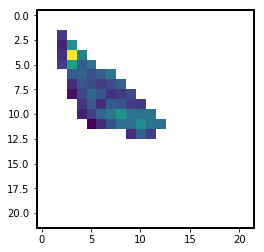

In [1134]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(newmeangridnew_full)

In [ ]:
winter_list = [pd.read_csv('completed/12_full_12.csv'),pd.read_csv('completed/01_full_1.csv'),pd.read_csv('completed/02_full_2.csv')]
winter = pd.concat(winter_list)

In [ ]:
x = winter['obs_lon']
y = winter['obs_lat']
z = winter['o_MLDminusG_MLD']
    
xi = np.arange(-76,-65,0.5)
yi = np.arange(35,46,0.5)

xi,yi = np.meshgrid(xi,yi)
    
ci = griddata((x,y),z,(xi,yi),method='linear')
    
ci_short = ci.reshape((22,22)) ###

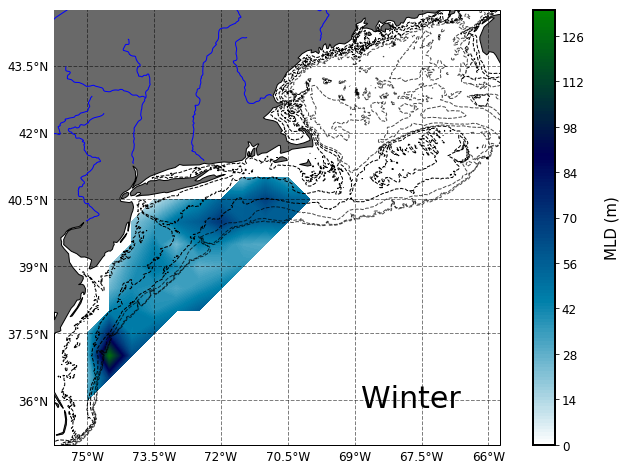

In [1141]:
from matplotlib.pyplot import * ; import cartopy.feature as cfeature

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-75.75, -65.75, 35, 44.75], ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='black', alpha=0.5, linestyle='--', zorder = 20)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12, 'color': 'black'}
gl.ylabel_style = {'size': 12, 'color': 'black'}

plt.text(-68.85, 35.85, 'Winter', dict(size=30))

cf = plt.contourf(xi,yi,newmeangridnew_full, np.arange(0, 135,1), cmap = 'ocean_r')
# cf = plt.contourf(xi,yi,d,np.arange(0, 120,1), cmap = 'ocean_r')
# cf = plt.contourf(xi,yi,d,np.arange(-0.62, 0.62,0.005), cmap = 'seismic')
# cf = plt.contourf(xi,yi,d,np.arange(0, 122,2), cmap = 'ocean_r')
# cf = plt.contourf(xi,yi,d,np.arange(0, 50,0.5), cmap = 'ocean_r')
# ax.contour(xi, yi, d, levels=12, linewidths=1,colors='white',zorder=5,)
ax.contour(lonNC, latNC, depthNC, [-300,-200,-100], linewidths=1,colors='black', alpha = 0.7,zorder=5) #alpha = 0.7
ax.contour(lonNC, latNC, depthNC, [-75,-50,-25], linewidths=1,colors='black',zorder=5)

feature = cfeature.NaturalEarthFeature(name='coastline', category='physical',scale='50m',edgecolor='black', facecolor='dimgray')
ax.add_feature(feature,zorder=10)
cbar = plt.colorbar(cf, ax=ax)
cbar.ax.get_yaxis().labelpad = 20
cbar.ax.set_ylabel('MLD (m)', rotation=90, fontsize = 15)
# cbar.set_ticks([-0.6,-0.4,-0.2,0.0,0.2,0.4,0.6])
# cbar.set_ticks([0,10,20,30,40,50,60,70,80,90,100,110,120])
# cbar.set_ticks([-60,-40,-20,0,20,40,60])
cbar.ax.tick_params(labelsize=12)
# cbar.ax.set_yticklabels([-60,-40,-20,0,20,40,60],rotation=90)

# rivers = cartopy.feature.NaturalEarthFeature(
#     category='physical', name='rivers_lake_centerlines',
#     scale='10m', facecolor='none', edgecolor='blue')

ax.add_feature(rivers, linewidth=1, zorder=60)

# plt.savefig('seasonal_WGoM')

plt.show()

In [ ]:
import numpy as np
from matplotlib.path import Path

# nx = np.arange(-76*100,-65*100,25)
# ny = np.arange(35*100,46*100,25)

nx = np.arange(-76,-65,0.5)
ny = np.arange(35,46,0.5)

# poly_verts = df_w_plottable.values 

poly_verts_w = df_w_plottable.values 
poly_verts_v = df_v_plottable.values 
poly_verts_x = df_x_plottable.values 
poly_verts_y = df_y_plottable.values 
poly_verts_t = df_t_plottable.values 

full_pandas = df_w_plottable.append(df_v_plottable)
full_pandas = full_pandas.append(df_x_plottable)
full_pandas = full_pandas.append(df_y_plottable)
full_pandas = full_pandas.append(df_t_plottable)
poly_verts_full = full_pandas.values

# print(df_w_plottable.values )

newlon = [-69.5,-68,-67.5, -67, -66.5, -66, -65.7, -66,-66, -66.5, -67,
         -68, -69, -70,-70.5, -70.5,-69.5, -72, -74, -74.25, -76, -75.5, -75, -74.75, -74.5, -72, -71.4, -69.5]
newlat = [40,40.3,40.4, 40.6, 40.8, 41.45, 41.8, 42.1, 43, 44.2, 44.2, 44.2, 43.9, 43.7,
         43, 42.2, 41, 41, 40.5, 39.4, 37, 36, 35.5, 36, 37.4, 39.5, 40, 40]
newpath = list(zip(newlon,newlat))
newpd = pd.DataFrame(newpath, columns=['lon','lat'])
path_new = Path(newpath)

# full_numpyarray = poly_verts_w.append(poly_verts_v,poly_verts_x,poly_verts_y,poly_verts_t)

# Create vertex coordinates for each grid cell...
# (<0,0> is at the top left of the grid in this system)
x, y = np.meshgrid(nx, ny)
x, y = x.flatten(), y.flatten()

points = np.vstack((x,y)).T

# path = Path(poly_verts)
path_w = Path(poly_verts_w)
path_v = Path(poly_verts_v)
path_x = Path(poly_verts_x)
path_y = Path(poly_verts_y)
path_t = Path(poly_verts_t)
path_full = Path(poly_verts_full)

# grid = path.contains_points(points)
# grid = path_w.contains_points(points) 
# grid = path_full.contains_points(points) 
grid = path_new.contains_points(points) 

# grid = path_w.contains_points(points) or path_v.contains_points(points) or path_x.contains_points(points) or path_y.contains_points(points) or path_t.contains_points(points)

grid = grid.reshape((22,22))